# ANÁLISIS DEL DATASET "DIAMONDS".

## 1-CARGA DE DATOS, LIBRERÍAS DE PYTHON Y FUNCIONES AUXILIARES.

### 1.1-CARGA DE LIBRERÍAS DE PYTHON.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### 1.2-CARGA DE DATOS.

In [2]:
# Archivo fuente de datos
file = './Data/diamonds.csv'

# Carga del archivo fuente y generación del DataFrame
df = pd.read_csv(file)

### 1.3-FUNCIONES AUXILIARES.

Dado que se han recibido instrucciones recomendando presentar el ejercicio en un único archivo (de Jupyter Notebook), se incluyen a continuación las funciones creadas utilizadas durante el desarrollo del ejercicio. Lo ideal habría sido almacenar estas funciones en un archivo .py a parte, e importarlo al archivo de Jupyter Notebook.

In [3]:
# Función para buscar valores '0' o '0.' en las columnas, en formato texto o numérico, de un DataFrame.
# Entrada: pd.DataFrame
# Salida: Lista con los nombres de las columnas del DataFrame donde se encontraron coincidencias. Si la lista está vacía, se devuelve False
def buscar_ceros_df (df):
    lista_coincidencias = [] # Lista para almacenar los nombres de las columnas donde se encontraron coincidencias.
    for columna in df.columns:
       if df[columna].apply(lambda x: str(x) in ['0', '0.0'] or x == 0).any(): # Se comprueba si existe algún valor 0 en las columna, ya sea en formato texto o numérico.
           lista_coincidencias.append(columna)
    if lista_coincidencias == []: # No se ha añadido ningún nombre de columna a la lista.
        print('No se han encontrado coincidencias.')
        return False
    else:
        return lista_coincidencias

# Función para buscar coincidencias de caracteres las columnas de un DataFrame. Puede buscar coincidencias de cualquier tipo de dato convertible a string, incluso de valores NaN (np.nan)
# Entrada: pd.DataFrame, valor
# Salida: Lista con los nombres de las columnas del DataFrame donde se encontraron coincidencias. Si la lista está vacía, se devuelve False
def buscar_caracter_df (df, caracter):
    lista_coincidencias = [] # Lista para almacenar los nombres de las columnas donde se encontraron coincidencias.
    for columna in df.columns:
       if df[columna].astype(str).str.contains(str(caracter)).any(): # Se convierten los valores de la columna a string y se busca el caracter en la columna.
           lista_coincidencias.append(columna)
    if lista_coincidencias == []: # No se ha añadido ningún nombre de columna a la lista.
        print('No se han encontrado coincidencias.')
        return False
    else:
        return lista_coincidencias

# Función para reemplazar valores (nulos o 'NaN'): por la mediana, en el caso de valores numéricos; por la moda, en el caso de valores categóricos.
# Entrada: pd.DataFrame / valor a sustituir (de tipo string|category|boolean o tipo NaN)
# Salida: pd.DataFrame / Se imprime en pantalla el número de reemplazos realizados por la moda y por la mediana. / Devuelve False si la no ha habido reemplazos.
def reemplazar_nan (df, lista_columnas):
    contador_modas = 0
    contador_medianas = 0
    for columna in lista_columnas:
        if columna not in df.columns:
            print(f'La columna {columna} no existe en el DataFrame.')
        else:
            condicion_busqueda = df[columna].apply(lambda x: str(x) in ['0', '0.0'] or x == 0) # Seleccionar los valores 0 de la columna, ya sean de tipo numérico o no.
            if pd.api.types.is_numeric_dtype(df[columna]): # Los valores son de tipo numérico.
                # Se calcula la mediana excluyendo los ceros a sustituir, para que no influyan en el cálculo de la mediana.
                mediana_sin_ceros = df.loc[~condicion_busqueda, columna].median()
                df[columna] = df[columna].fillna(mediana_sin_ceros)
                contador_modas += 1
            else : # Los valores no son de tipo numérico.
                moda_sin_ceros = df.loc[~condicion_busqueda, columna].mode()[0] 
                df[columna] = df[columna].fillna(moda_sin_ceros)
                contador_medianas += 1
    if contador_modas == 0 & contador_medianas == 0: # No se han encontrado valores NaN en el DataFrame.
        print('No se han encontrado valores NaN que sustituir.')
        return False
    if contador_modas > 0: # Se han reemplazado valores NaN por modas.
        print(f'Se han reemplazado valores NaN en {contador_modas} columnas por la moda de la columna.')
    if contador_medianas > 0: # Se han reemplazado valores NaN por medianas.
        print(f'Se han reemplazado valores NaN en {contador_medianas} columnas por la mediana de la columna.')
    else:
        None

    return df
    
# Función para sustituir valores 0: por la mediana, en columnas con valores numéricos; por la moda, en columnas con valores no numéricos de un Data frame.
# Entrada: pd.DataFrame, lista de nombres de columnas con valores que contengan, al menos, un valor 0.
# Salida: pd.DataFrame | Se imprime un mensaje si alguna columna no existe en el DataFrame.
def reemplazar_ceros (df, lista_columnas):
    contador_modas = 0
    contador_medianas = 0
    # Iterar sobre las columnas especificadas
    for columna in lista_columnas:
            if columna in df.columns:  # Verificar que la columna existe en el DataFrame.
                condicion_busqueda = df[columna].apply(lambda x: str(x) in ['0', '0.0'] or x == 0) # Seleccionar los valores 0 de la columna, ya sean de tipo numérico o no.
                if pd.api.types.is_numeric_dtype(df[columna]): # Los valores son de tipo numérico. 
                    # Se calcula la mediana excluyendo los ceros a sustituir, para que no influyan en el cálculo de la mediana.
                    mediana_sin_ceros = df.loc[~condicion_busqueda, columna].median()
                    # Reemplazar los ceros por la mediana.
                    df.loc[condicion_busqueda, columna] = mediana_sin_ceros
                    contador_medianas += 1
                else : # Los valores no son de tipo numérico.
                    moda_sin_ceros = df.loc[~condicion_busqueda, columna].mode()[0]
                     # Reemplazar los ceros por la moda.
                    df.loc[condicion_busqueda, columna] = moda_sin_ceros
                    contador_medianas += 1
            else:
                print(f"La columna '{columna}' no existe en el DataFrame.")

    if (contador_modas == 0) & (contador_medianas == 0): # No se han encontrado valores NaN en el DataFrame.
        print('No se han encontrado valores 0 que sustituir.')
        return False
    if contador_modas > 0: # Se han reemplazado valores 0 por modas.
        print(f'Se han reemplazado valores 0 en {contador_modas} columnas por la moda de la columna.')
    if contador_medianas > 0: # Se han reemplazado valores 0 por medianas.
        print(f'Se han reemplazado valores 0 en {contador_medianas} columnas por la mediana de la columna.')
    else:
        None
    
    return df

# Función para reemplazar caracteres (especciales) por valores NaN en las columnas de un DataFrame de Pandas.
# Entrada: pd.DataFrame, caracter a sustituir, lista de nombres de columnas.
# Salida: pd.DataFrame | Se imprime un mensaje si alguna columna no existe en el DataFrame.
def reemplazar_caracter_por_nan (df, lista_columnas, caracter):
    contador_reemplazos = 0
    for columna in lista_columnas:
        if columna in df.columns:  # Verificar que la columna existe en el DataFrame.
            df[columna] = df[columna].replace(str(caracter), np.nan)
            contador_reemplazos += 1
        else:
            print(f"La columna '{columna}' no existe en el DataFrame.")
    if contador_reemplazos == 0: # No se han encontrado valores NaN en el DataFrame.
        print(f"No se han encontrado el caracter '{caracter}' que sustituir.")
        return False
    else:
        print(f"Se han reemplazado {contador_reemplazos} columnas con algún valor '{caracter}' por valores NaN.")
    return df

# Función para comprobar si un DataFrame tiene filas duplicadas. Si tuviera filas duplicadas, se eliminan y se resetea el índice del DataFrame.
# Entrada: pd.DataFrame
# Salida: pd.DataFrame | Se imprime el número de filas del DataFrame antes de eliminar duplicados y después un mensaje si no se han encontrado filas duplicadas.
def eliminar_filas_duplicadas (df):
    numero_filas_inicial = df.shape[0] # Número de filas del DataFrame antes de eliminar duplicados.
    print(f'Número de filas antes de eliminar duplicados: {numero_filas_inicial}')
    if df.duplicated().any():
        filas_duplicadas = df.duplicated().sum()
        print(f'Se han encontrado {filas_duplicadas} filas duplicadas.')
        df = df.drop_duplicates().reset_index(drop=True) # Se eliminan filas duplicadas y se resetea el índice.
        print(f'Se han eliminado {numero_filas_inicial - df.shape[0]} filas duplicadas.')
        print(f'El DataFrame contiene ahora {df.shape[0]} filas.')
    else: # no hay filas duplicadas.
        print('No se han encontrado filas duplicadas.')
        print(f'El número de filas actual del DataFrame es de {df.shape[0]} filas')
    return df

# Función para cambiar el tipo de dato de las columnas de un DataFrame si coinciden con un tipo numérico específico.
# Entrada: pd.DataFRame, tipo de dato inicial a buscar, tipo de dato final al que se convertirán las columnas.
# Salida: pd.DataFrame | False, si los datos de entrada no son tipos numéricos admitidos.
def cambiar_tipos_numericos(df, tipo_inicio, tipo_final):
    tipos_numericos = ['int8', 'int16', 'int32', 'int64','uint8', 'uint16', 'uint32', 'uint64','float16', 'float32', 'float64'] # Lista con los tipos numéricos admitidos en Pandas.
    if (str(tipo_inicio) not in tipos_numericos) or (str(tipo_final) not in tipos_numericos): # Se comprueba que los tipos especificados sean numéricos.
        print('Los tipos especificados no son tipos numéricos admitidos.')
        return False
    for columna in df.columns:
        if df[columna].dtype == str(tipo_inicio): # Se comprueba si la columna es del tipo de inicio especificado.
            df[columna] = df[columna].astype(str(tipo_final)) # Se cambia el tipo de dato de la columna.
    return df

# Función para determinar si una columna con valores porcentuales tiene algún valor fuera de rango
# Entrada: pd.DataFrame, nombre de la columna
# Salida: Boolean (True si hay valores fuera de rango o la columna no existe, False si no los hay)
def valores_porcentuales_fuera_rango(df, columna):
    if columna in df.columns:
        if df[columna].apply(lambda x: x <= 0 or x > 100).any():
            print (f'Algún valor de la columna \'{columna}\' está fuera de rango.')
            return True
        else:
            print (f'Todos los valores de la columna \'{columna}\' están dentro del rango.')
            return False
    else:
        print(f'La columna \'{columna}\' no existe en el DataFrame.')
        return True

# Función para determinar si los valores numéricos de una columna se encuentran fuera de rango o no.
# Entrada: pd.DataFrame, nombre de la columna, valor mínimo permitido, valor máximo permitido (puede no tener).
# Salida: Boolean (True si hay valores fuera de rango o la columna no existe, False si no los hay)
def valores_numericos_fuera_rango(df, columna, valor_min, valor_max= None):
    if columna in df.columns:
        if valor_max != None: # No existe un valor máximo.
            if df[columna].apply(lambda x: x < valor_min or x > valor_max).any():
                print (f'Algún valor de la columna \'{columna}\' está fuera de rango.')
                return True
            else:
                print (f'Todos los valores de la columna \'{columna}\' están dentro del rango.')
                return False
        else: # Existe un valor máximo.
            if df[columna].apply(lambda x: x < valor_min).any():
                print (f'Algún valor de la columna \'{columna}\' está fuera de rango.')
                return True
            else:
                print (f'Todos los valores de la columna \'{columna}\' están dentro del rango.')
                return False        
    else:
        print(f'La columna \'{columna}\' no existe en el DataFrame.')
        return True

# Función para determinar si los valores discretos, no numéricos de una columna, se encientran dentro del rango o no.
# Entrada: pd.DataFrame, nombre de la columna, lista con los valores permitidos.
# Salida: Boolean (True si hay valores fuera de rango o la columna no existe, False si no los hay)
def valores_discretos_fuera_rango(df, columna, lista_valores):
    lista_valores_minusculas = list(map(str.lower, lista_valores)) # Se transforma a minúsculas, para asegurarnos la comparación entre strings en minúsculas.
    if columna in df.columns:
        if df[columna].apply(lambda x: str(x).lower() not in lista_valores_minusculas).any():
            print (f'Algún valor de la columna \'{columna}\' está fuera de rango.')
            return True
        else:
            print (f'Todos los valores de la columna \'{columna}\' están dentro del rango.')
            return False
    else:
        print(f'La columna \'{columna}\' no existe en el DataFrame.')
        return True

# Función para crear un encoding ordinal, a partir de una columna de tipo 'object' de un DataFrame.
# Entrada: pd.DataFrame & nombre de la columna categórica & lista con los valores posibles de la columna, ordenados de menor a mayor valor
# Salida pd.DataFrame | False si la columna no existe en el DataFrame | False si la columna no es de tipo categórico.
def encoding_ordinal_object (df, columna, lista_valores):
    if columna not in df.columns:
        print(f'La columna {columna} no existe en el DataFrame {df}.')
        return False
    else: # La columna sí existe en el DataFrame.
        if df[columna].dtype.name == 'object': # La columna es de tipo 'object'.
            nombre_nueva_columna = f'{columna}_ordinal'
            orden_valores = [i for i in range(1, len(lista_valores) + 1)]
            dict_ordinal = dict(zip(lista_valores, orden_valores))
            df[nombre_nueva_columna] = df[columna].map(dict_ordinal)
            return df
        else: # La columna no es de tipo 'object'.
            print (f'La columna {columna} no es de tipo "object" y no se puede aplicar esta función.')
            return False

# Función para crear un encoding ordinal de una columna categórica de un DataFrame.
# Entrada: pd.DataFrame & nombre de la columna categórica & lista con los valores posibles de la columna, ordenados de menor a mayor valor
# Salida pd.DataFrame | False si la columna no existe en el DataFrame | False si la columna no es de tipo categórico.
def encoding_ordinal_category (df, columna, lista_valores):
    if columna not in df.columns:
        print(f'La columna {columna} no existe en el DataFrame {df}.')
        return False
    else: # La columna sí existe en el DataFrame.
        if df[columna].dtype.name != 'category': # La columna no es de tipo categórico.
            print (f'La columna {columna} no es de tipo "category".')
            return False
        else: # La columna sí es de tipo 'category'.
            df[columna] = df[columna].cat.set_categories(lista_valores, ordered=True)
            return df         
        

## 2-ANÁLISIS PRELIMINAR DEL DATAFRAME.

### 2.1-ANÁLISIS DE LA ESTRUCTURA DEL DATAFRAME.

#### 2.1.1-VISUALIZACIÓN PREVIA DEL DATAFRAME.

In [4]:
df.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.2,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df[25000::5]

,carat,cut,color,clarity,depth,table,price,x,y,z
25000,1.29,Ideal,E,VVS2,59.8,59.0,13530,7.07,7.11,4.24
25005,1.50,Very Good,F,VS2,59.7,56.0,13537,7.42,7.46,4.44
25010,2.00,Good,J,VS2,61.4,63.0,13542,8.01,8.08,4.94
25015,1.50,Fair,G,VVS2,64.8,56.0,13553,7.18,7.12,4.63
25020,0.38,Ideal,F,SI1,61.8,55.0,640,4.66,4.69,2.89
...,...,...,...,...,...,...,...,...,...,...
53915,0.77,Ideal,E,SI2,62.1,56.0,2753,5.84,5.86,3.63
53920,0.70,Very Good,E,VS2,62.4,60.0,2755,5.57,5.61,3.49
53925,0.79,Ideal,I,SI1,61.6,56.0,2756,5.95,5.97,3.67
53930,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49


In [6]:
df.tail(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


Como se puede observar en las tablas superiores, el DataFrame cargado consta de 53.940 filas y 10 columnas, de las cuales, 7 columnas son numéricas y 3 columnas son categóricas, en principio.

### 2.2-ANÁLISIS DE LA INCONSISTENCIA DE DATOS.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53939 non-null  float64
 1   cut      53937 non-null  object 
 2   color    53938 non-null  object 
 3   clarity  53938 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53938 non-null  float64
 6   price    53938 non-null  object 
 7   x        53938 non-null  object 
 8   y        53939 non-null  float64
 9   z        53939 non-null  float64
dtypes: float64(5), object(5)
memory usage: 4.1+ MB


Al ampliar la información del DataFrame, como se puede apreciar en la tabla superior, se indica que el DataFrame tiene 53.940 filas. Sin embargo, existe una única columna (la 4 - 'depth') en cuyas observaciones no existe ningún valor nulo. En el resto de columnas, se han detectado valores nulos: existen columnas con 1 valor nulo ('carat', 'y', 'z'), 2 valores nulos ('color', 'clarity', 'table' y 'price') y 3 valores nulos ('cut').
<p>Por otra parte, algunas columnas no tienen el tipo de dato que se esperaba a priori. Por ejemplo, las columnas 'price' y 'x', en principio, se esperaban que contuvieran valores numéricos y se han detectado valores de tipo 'object', por lo que los valores de las columnas indicadas pueden haberse cargado como tipo 'string'.
<P>Por todo ello, se deduce que existen valores inconsistentes en las columnas mencionadas que hay que tratar adecuadamente. 
<p>En principio, las cantidades de estas inconsitencias encontradas no son muy numerosas. Dada la cantidad total de las filas del DataFrame, las inconsistencias no parecen tener un peso importante en el conjunto del mismo, y una de las opciones podría ser eliminar directamente las filas afectadas. No obstante, es preferible evitar su eliminación (afín de no perder información) y las filas/columnas afectadas se van a tratar adecuadamente. Para ello, a continuación se procede al análisis de cada columna afectada.

### 2.3-ANÁLISIS POR COLUMNAS.

#### 2.3.1-COLUMNA: 'carat'.

La columna 'carat', en castellano "quilate", es una de las principales características que definen un diamante. Los quilates son una unidad de medida que representan el peso del diamante. El quilate, se abrevia como 'ct.' y se subdivide en 100 partes, denominadas 'points'. 1 quilate equivale a 0,2 gr.
<p>Por tanto, la columna 'carat' representa a una variable cuantitativa de tipo continua. Los valores esperables de esta variable son numéros reales positivos, con un rango de posibles valores pequeños, por norma general.

In [8]:
# Se imprimen los valores únicos de la columna. Se aprecia que el último valor obtenido es de tipo 'NaN
print(df['carat'].unique())

[0.23 0.21 0.29 0.31 0.24 0.26 0.22 0.3  0.2  0.32 0.33 0.25 0.35 0.42
 0.28 0.38 0.7  0.86 0.71 0.78 0.96 0.73 0.8  0.75 0.74 0.81 0.59 0.9
 0.91 0.61 0.77 0.63 0.76 0.64 0.72 0.79 0.58 1.17 0.6  0.83 0.54 0.98
 0.52 1.01 0.53 0.84 0.51 1.05 0.55 0.87 1.   0.57 0.82 1.04 0.93 1.2
 0.99 0.34 0.43 0.36 0.95 0.89 1.02 0.97 0.56 0.85 0.92 1.27 0.66 1.12
 0.68 1.03 0.62 1.22 1.08 0.88 0.5  1.19 0.39 0.65 1.24 1.5  0.27 0.41
 1.13 1.06 0.69 0.4  1.14 0.94 1.29 1.52 1.16 1.21 1.23 1.09 0.67 1.11
 1.1  1.18 1.15 1.25 1.07 1.28 1.51 0.37 1.31 1.26 1.39 1.44 1.35 1.3
 1.32 1.41 1.36 1.45 1.34 1.58 1.54 1.38 1.33 1.74 1.64 1.47 1.4  1.55
 1.95 2.   1.37 1.83 1.62 1.57 1.69 2.06 1.72 1.66 2.14 1.49 1.46 2.15
 1.96 2.22 1.7  1.53 1.85 2.01 2.27 1.68 1.56 1.81 1.65 1.82 2.03 1.73
 1.59 1.42 1.43 2.08 1.48 1.6  2.49 1.71 2.02 2.07 3.   2.21 2.1  1.91
 2.25 2.17 2.32 2.72 1.61 2.23 2.11 2.05 1.63 2.3  2.31 1.75 2.04 2.12
 1.77 2.5  1.8  1.67 1.84 2.2  3.01 1.88 2.33 2.68 2.34 1.9  2.16 2.74
 1.78 1.7

In [9]:
# Se imprimen los valores únicos de la columna junto a su frecuencia de aparición.
df['carat'].value_counts(dropna=False, sort=True, ascending=True)

carat
NaN        1
3.40       1
3.67       1
4.00       1
3.50       1
        ... 
0.32    1840
0.70    1981
1.01    2242
0.31    2249
0.30    2604
Name: count, Length: 274, dtype: int64

A parte de los valores NaN, no se aprecia ningún otro valor inconsistente en la columna.

In [10]:
# Se imprime la línea que contiene el valor 'NaN' en la columna 'carat'
print(df[df['carat'].isnull()])

       carat      cut color clarity  depth  table price     x     y     z
37626    NaN  Premium     G     SI1   61.0   60.0   990  4.93  4.88  2.99


In [11]:
filas_valor_cero = df[df['carat']==0]
filas_valor_cero

,carat,cut,color,clarity,depth,table,price,x,y,z


#### 2.3.2-COLUMNA: 'cut'.

El 'cut', en castellano 'corte', es otra de las características principales que definen a un diamante. El corte de un diamante está condicionado por la forma en la que se ha tallado (cortado) y pulido un diamante. En función de cómo se haya realizado este corte, el diamante adquiere una serie de propiedades muy valoradas a la hora de evaluar la calidad de un diamante, como son: las proporciones, la simetría y, sobre todo, el brillo con la cantidad de luz que puede reflejar (a mayor cantidad de luz reflejada, más brillo y mejor calidad).
<p>El corte se mide es una escala de valores cualitativos. Esta escala está definida, en este caso, de la siguiente forma (de menor a mayor calidad):
<p><strong>'Fair' < 'Good' < 'Very Good' < 'Premium' < 'Ideal'</strong>
<p>La columna 'cut', por tanto, representa a una variable cualitativa de tipo ordinal y de valores discretos. Los valores que puede adquirir son los mencionados en el párrafo anterior.

In [12]:
# Lista con valores posibles de la columna 'cut', ordenados de peor a mejor calidad.
lista_valores_cut = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']

In [13]:
# Se imprimen los valores únicos de la columna.
print(df['cut'].unique())

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair' nan '?']


In [14]:
# Se imprimen los valores únicos de la columna junto a su frecuencia de aparición.
df['cut'].value_counts(dropna=False)

cut
Ideal        21549
Premium      13791
Very Good    12080
Good          4906
Fair          1610
NaN              3
?                1
Name: count, dtype: int64

Se observa que, además de los 3 valores NaN, también aparece un valor '?', que no se correspondería con un valor esperado en la columna 'cut'.

In [15]:
# Se imprime la fila que contiene el caracter '?' en la columna 'cut'
df[df['cut'].str.contains(r'\?', na=False)]

,carat,cut,color,clarity,depth,table,price,x,y,z
49227,0.5,?,E,VVS2,61.7,61.0,2083,5.09,5.12,3.15


In [16]:
# Se imprimen las líneas que contienen el valor 'NaN' en la columna 'cut'
print(df[df['cut'].isnull()])


       carat  cut color clarity  depth  table  price     x     y     z
14432   1.20  NaN     G     SI2   61.1   57.0   5826  6.86  6.83  4.18
14468   1.08  NaN     H     VS2   62.1   56.0   5839  6.59  6.56  4.08
27259   2.01  NaN     E     SI1   62.7   57.0  17676  8.03  8.11  5.06


In [17]:
filas_valor_cero = df[df['cut'].str.startswith('0', na=False)]
filas_valor_cero

,carat,cut,color,clarity,depth,table,price,x,y,z


No hay valores '0'.

#### 2.3.3-COLUMNA: 'color'.

La columna 'color' representa otra de las características de la definición de un diamante. Un diamante perfecto no debe tener matices ni color. Esta propiedad se mide, habitualmente, mediante  la gradiación definida por el GIA (Gemmological Institute of America)
<p>https://www.kalfin.com.au/wp-content/uploads/2021/04/4-Cs-color-inside.jpg
<p>Esta graduación mide esta propiedad mediante una escala alfabética que va, de mayor a menor calidad, desde la 'D' (ausencia de color) hasta la 'Z' (mayor grado de color). A lo largo de la escala, el diamante puede presentar diferentes tonalidades de color: Sin color, Casi sin color, 
Amarillo tenue, Amarillo muy claro y Amarillo claro.
<p>Por tanto, la columna 'color' representa a una variable cualitativa de tipo ordinal y de valores discretos. Los valores que puede adoptar, atendiendo a la escala alfabética, son valores de texto desde la letra 'D' hasta la letra 'Z'.


In [18]:
# Lista con los valores posibles de la columna 'color', odenados de menor a mayor calidad.
lista_valores_color = ['D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

In [19]:
# Se imprimen los valores únicos de la columna junto a su frecuencia de aparición.
print(df['color'].value_counts(dropna=False))

color
G      11291
E       9797
F       9542
H       8304
D       6774
I       5421
J       2808
NaN        2
?          1
Name: count, dtype: int64


Se observa que, además de los 2 valores 'NaN', también aparece un valor '?' no esperado en la columna.

In [20]:
# Se imprimen las líneas que contienen el valor 'NaN' en la columna 'color'
print(df[df['color'].isnull()])


       carat    cut color clarity  depth  table  price     x     y     z
27260   2.32  Ideal   NaN     SI2   62.0   57.0  17676  8.49  8.45  5.25
37629   0.40  Ideal   NaN     SI1   61.8   55.0    990  4.78  4.74  2.94


In [21]:
filas_valor_cero = df[df['color'].str.startswith('0', na=False)]
filas_valor_cero

,carat,cut,color,clarity,depth,table,price,x,y,z


#### 2.3.4-COLUMNA: 'clarity'.

La columna 'clarity', en castellano 'claridad', es otra de las características que definen las propiedades de un diamante.
<p>La claridad de un diamante mide la presencia o ausencia de impurezas, también llamadas inclusiones o manchas. Estas impurezas son fruto de la forma en la que se ha formado el diamante y que han sido atrapadas antes de que el diamante haya sido sometido a las fuertes presiones y altas temperaturas que ocasionan la formación de los diamantes en la corteza terrestre.
<p>Para determinar la claridad de un diamante, se tiene en cuenta el número, tamaño, posición y color de estas impurezas. Estas impurezas afectan directamente al brillo y transparencia del diamante. La claridad se mide en una escala, ordenada de mayor a menor calidad:
<ul>
<li><strong>FL</strong>-Flawless: sin inclusiones ni manchas.
<li><strong>IF</strong>-Internally Flawless: sin inclusiones.
<li><strong>VVS1 & VVS2</strong>-Very Very Slight Inclusions Level 1 and 2: leves inclusiones difíciles de apreciar incluso por un experto.
<li><strong>VS1 & VS2</strong>-Very Slight Inclusions Level 1 and 2: inclusiones observables con dificultad.
<li><strong>SI1 & S2</strong>-Flawless: inclusiones más aparentes.
<li><strong>I1 & I2 & I3</strong>-Inclusions Level 1, 2 y 3: presencia clara inclusiones, observables sin necesidad de herramientas de magnificación de la imágen.
</ul>
<p>En consecuencia, la columna 'clarity' representa a una variable cualitativa de tipo ordinal y de valores discretos. Los valores que puede adoptar se corresponden con una escala de valores de tipo alfanumérico (tipo texto). Estos valores posibles, ordenados de menor a mayor calidad, son:
<p><strong>'I1' < 'I2' < 'I3' < 'SI1' < 'SI2' < 'VS1' < 'VS2' < 'VVS1' < 'VVS2' < 'IF' < 'FL'</strong>



In [22]:
# Lista con los valores posibles de la columna 'clarity', ordenados de menor a mayor calidad.
lista_valores_clarity = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF', 'FL']

In [23]:
# Se imprimen los valores únicos de la columna.
print(df['clarity'].unique())

['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF' nan]


In [24]:
# Se imprimen los valores únicos de la columna junto a su frecuencia de aparición.
df['clarity'].value_counts(dropna=False)

clarity
SI1     13065
VS2     12257
SI2      9194
VS1      8170
VVS2     5066
VVS1     3655
IF       1790
I1        741
NaN         2
Name: count, dtype: int64

En este caso, aparecen 2 valores NaN.

In [25]:
# Se imprimen las líneas que contienen el valor 'NaN' en la columna 'clarity'
print(df[df['clarity'].isnull()])


       carat        cut color clarity  depth  table price     x     y     z
14437   1.00       Good     F     NaN   64.8   59.0  5829  6.17  6.23  4.02
14466   1.01  Very Good     G     NaN   61.6   56.0  5839   6.4  6.46  3.96


In [26]:
filas_valor_cero = df[df['clarity'].str.startswith('0', na=False)]
filas_valor_cero

,carat,cut,color,clarity,depth,table,price,x,y,z


#### 2.3.5-COLUMNA: 'table'.

La columna 'table' (en castellano 'tabla', 'mesa' o 'meseta'), es otra de las características que definen las propiedades de un diamante.
<br><img><src="https://cdn.shopify.com/s/files/1/0786/5411/2034/files/Parts-of-loose-diamonds_480x480.webp?v=1689142933">

<p>La tabla es la amplia cara (faceta) plana de la parte superior del diamante. El tamaño de la tabla afecta a la proporcionalidad general del diamante, que a su vez, también afectará al fuego (otra de las características de un diamante) y al brillo del diamante.
<p>La tabla se mide en tanto por ciento. Relaciona el tamaño de la mesa con el diámetro promedio de la cintura del diamante. El valor de la tabla dependerá, por tanto, de la forma en la que se haya cortado el diamante. No existe una clara graduación sobre cómo clasificar el valor de la tabla, y en ocasiones, su valor no es determinante para calificar la calidad general del diamante. Una orientación sobre el valor ideal de la tabla es un rango de valores entre el 54% y el 60% para diamantes de talla redonda, mientra que para los diamantes de talla esmeralda el valor ideal de la tabla se encuentra entre el 66% y el 72%.
<p>Con todo ello, la columna 'table' representa a una variable cuantitativa de tipo continuo. Como se ha mencionado anteriormente, su valor es un porcentaje, por lo que los valores que puede adoptar son números reales positivos, en el rango de mayor que 0 a 100.

In [27]:
# Se imprimen los valores únicos de la columna.
print(df['table'].unique())

[55.  61.  65.  58.  57.  56.  54.  62.  59.  63.  60.  55.3 69.  53.
 64.  56.4 60.5 67.  52.  55.8 66.  70.  68.  54.4 57.1 53.6 54.8 54.2
 54.9 56.7 53.9 57.8 54.1 55.1 51.  58.1 56.9 56.5 53.7 60.7 56.2 56.6
 56.1 56.3 57.2 57.5 60.9 59.8 62.3 60.1 55.9 50.1 62.2 54.5 55.7 53.4
 54.7 58.8 59.4 62.5 54.3 60.6 55.2 58.6 49.  50.  54.6 62.6 57.7 56.8
 57.9 60.3 55.6 59.5 57.4 62.4 60.4 53.3 60.2 60.8 58.5 57.6 43.  59.9
 63.5 57.3 61.4 58.3 55.4 58.2 53.5 59.7  nan 55.5 58.7 53.8 59.1 53.2
 59.3 61.1 51.6 95.  61.2 59.2 58.4 53.1 52.8 44.  61.3 61.9 61.8 59.6
 61.5 58.9 64.3 62.8 71.  52.4 63.3 61.7 64.2 73.  65.4 63.4 62.1 79.
 76.  61.6]


In [28]:
# Se imprimen los valores únicos de la columna junto a su frecuencia de aparición.
df['table'].value_counts(dropna=False)

table
56.0    9881
57.0    9724
58.0    8368
59.0    6571
55.0    6268
        ... 
63.4       1
62.1       1
79.0       1
76.0       1
61.6       1
Name: count, Length: 128, dtype: int64

In [29]:
# Se imprimen las líneas que contienen el valor 'NaN' en la columna.
print(df[df['table'].isnull()])


       carat      cut color clarity  depth  table  price     x     y     z
14445   1.22  Premium     I     VS2   62.3    NaN   5832  6.79  6.83  4.24
27256   2.28  Premium     I     SI1   61.6    NaN  17673  8.43  8.46  5.20


Aquí aparecen otros 2 valores NaN.

In [30]:
filas_valor_cero = df[df['table']==0]
filas_valor_cero

,carat,cut,color,clarity,depth,table,price,x,y,z


#### 2.3.6-COLUMNA: 'price'.

La columna 'price' representa al coste económico de adquisición de un diamante. Por tanto, se trata de una variable cuantitativa de tipo continuo. 
<p>Los valores esperables de esta columna son números reales positivos, con hasta 2 decimales, mayores que 0 (en principio, salvo casos especiales) y sin un límite superior definido. La unidad de medida, presumiblemente, es el euro (€).

In [31]:
# Se imprimen los valores únicos de la columna.
print(df['price'].unique())

['326' '327' '334' ... '2753' '2755' '2756']


In [32]:
# Se imprimen los valores únicos de la columna junto a su frecuencia de aparición.
df['price'].value_counts(dropna=False)

price
605     132
802     127
625     126
828     125
776     124
       ... 
9043      1
9044      1
2783      1
2794      1
2796      1
Name: count, Length: 11603, dtype: int64

In [33]:
# Se imprimen las líneas que contienen el valor 'NaN' en la columna.
print(df[df['price'].isnull()])


       carat        cut color clarity  depth  table price     x     y     z
14459   1.24  Very Good     I     VS2   62.7   55.0   NaN  6.82  6.87  4.29
27249   2.02  Very Good     F     SI1   60.1   60.0   NaN  8.21   NaN  4.96


Esta columna 'price' contiene valores que representan precios (en formato string) de diamantes. Dado que un precio '0' puede representar un valor anómalo no esperado, se busca en la columna si existe algún valor '0' o '0.'. Dando como resultado que no existe ningún valor de este tipo. En un apartado posterior, se realizará la conversión de tipo de dato a un tipo numérico más adecuado.

In [34]:
print(('0' in df['price']) | ('0.' in df['price']))


False


#### 2.3.7-COLUMNA: 'x'.

La columna 'x' representa a la anchura del diamante, medida de un extremo a otro en su punto más amplio. Por tanto es una medida de longitud y se considera a la columna 'x' como una variable cuantitativa de tipo continuo.
<p>Los valores esperables de la columna 'x' son números reales positivos, con hasta 2 decimales (habitualmente). El rango de valores son mayores que 0 y sin un límite superior definido. La unidad de medida, presumiblemente, es el milímetro (mm.).

In [35]:
# Se imprimen los valores únicos de la columna.
print(df['x'].unique())

['3.95' '3.89' '4.05' '4.2' '4.34' '3.94' '4.07' '3.87' '4' '4.25' '3.93'
 '3.88' '4.35' '3.79' '4.38' '4.31' '4.23' '4.21' '4.26' '3.85' '4.39'
 '4.44' '3.97' '4.28' '3.96' '4.04' '4.01' '3.92' '4.06' '3.83' '4.29'
 '4.13' '4.49' '3.99' '4.19' '4.24' '4.36' '4.33' '4.02' '4.45' '3.91'
 '4.3' '4.43' '4.54' '4.78' '4.15' '4.08' '4.03' '4.65' '4.22' '5.7'
 '6.45' '5.68' '5.81' '5.85' '5.71' '6.27' '5.77' '5.97' '5.8' '6' '5.94'
 '5.87' '5.9' '6.14' '5.38' '5.96' '6.16' '5.73' '5.98' '5.72' '6.01'
 '5.64' '5.57' '5.63' '5.65' '6.09' '5.56' '6.11' '6.03' '5.89' '5.69'
 '5.62' '5.88' '5.52' '5.74' '5.53' '5.78' '5.83' '5.66' '5.82' '5.79'
 '5.92' '5.39' '5.33' '6.83' '5.41' '5.25' '5.24' '5.67' '5.61' '5.76'
 '6.05' '5.6' '5.19' '5.84' '6.39' '5.34' '5.14' '5.11' '5.54' '6.07'
 '6.29' '6.31' '6.49' '5.28' '5.48' '5.55' '6.41' '6.02' '5.91' '6.17'
 '6.61' '5.12' '6.19' '5.43' '5.99' '5.95' '6.37' '5.93' '6.46' '5.22'
 '5.75' '6.21' '6.15' '6.73' '5.49' '4.37' '4.47' '4.41' '4.27' '4.85'
 '4.

In [36]:
# Se imprimen los valores únicos de la columna junto a su frecuencia de aparición.
df['x'].value_counts(dropna=False)

x
4.37    448
4.34    437
4.33    429
4.38    428
4.32    425
       ... 
9.49      1
9.65      1
9.53      1
8.79      1
?         1
Name: count, Length: 556, dtype: int64

Aparece un valor '?'.

In [37]:
# Se imprimen las líneas que contienen el valor 'NaN' en la columna.
print(df[df['x'].isnull()])


       carat    cut color clarity  depth  table price    x     y     z
14446   1.01  Ideal     D     SI1   62.0   57.0  5832  NaN  6.44  3.97
14470   1.00   Fair     F     VS2   64.9   56.0  5840  NaN  6.31  4.08


In [38]:
filas_valor_cero = df[df['x'].str.startswith('0', na=False)]
filas_valor_cero

,carat,cut,color,clarity,depth,table,price,x,y,z
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0,0.00,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0,0.00,0.0
24520,1.56,Ideal,G,VS2,62.2,54.0,12800,0,0.00,0.0
26243,1.20,Premium,D,VVS1,62.1,59.0,15686,0,0.00,0.0
27429,2.25,Premium,H,SI2,62.8,59.0,18034,0,0.00,0.0
49556,0.71,Good,F,SI2,64.1,60.0,2130,0,0.00,0.0
49557,0.71,Good,F,SI2,64.1,60.0,2130,0,0.00,0.0


En esta columna, también aparecen varios valores '0', que deberán ser tratados adecuadamente.

#### 2.3.8-COLUMNA: 'y'.

La columna 'y' representa a la longitud del diamante, medida de un extremo a otro en la dirección más larga. Por tanto es una medida de longitud. La columna 'y' se considera como una variable cuantitativa de tipo continuo.
<p>Los valores esperables de la columna 'y' son números reales positivos, con hasta 2 decimales (habitualmente). El rango de valores son mayores que 0 y sin un límite superior definido. La unidad de medida, presumiblemente, es el milímetro (mm.).

In [39]:
# Se imprimen los valores únicos de la columna.
print(df['y'].unique())

[ 3.98  3.84  4.07  4.23  4.35  3.96  4.11  3.78  4.05  4.28  3.9   4.37
  3.75  4.42  4.34  4.29  4.26  4.27  4.3   3.92  4.43  4.47  4.01  3.94
  3.97  3.99  4.03  4.06  4.08  3.85  4.31  4.16  4.51  4.5   4.55  4.02
  4.24  4.38  3.95  4.48  3.89  3.88  4.33  4.32  4.59  4.84  4.22  4.
  4.25  4.13  4.09  4.04  4.12  4.67  5.72  6.33  5.67  5.73  5.85  5.9
  5.76  5.95  5.78  5.93  5.75  5.96  5.79  5.87  5.8   5.81  6.11  5.43
  6.    5.84  6.12  5.82  5.74  5.94  6.07  5.69  5.83  5.61  5.53  5.58
  5.59  5.97  6.09  5.99  5.86  5.68  5.65  5.55  5.77  5.91  5.56  5.89
  5.92  6.03  5.44  5.37  5.88  6.9   5.62  5.27  5.26  5.7   5.64  5.63
  5.71  5.51  5.22  6.36  5.54  5.66  6.2   5.18  5.15  6.1   6.21  6.22
  6.45  6.01  5.3   5.41  5.52  6.27  6.05  6.06  6.13  6.55  5.35  5.16
  6.25  6.02  5.46  6.23  6.08  5.45  6.41  6.34  5.25  6.15  6.19  6.66
  4.36  4.2   4.79  4.57  4.52  4.53  4.58  5.    6.67  5.11  6.29  6.04
  6.53  6.65  6.5   6.16  5.6   6.39  5.21  5.4   5.98

In [40]:
# Se imprimen los valores únicos de la columna junto a su frecuencia de aparición.
df['y'].value_counts(dropna=False)

y
4.34     437
4.37     435
4.35     425
4.33     421
4.32     414
        ... 
9.03       1
9.85       1
3.81       1
3.82       1
31.80      1
Name: count, Length: 553, dtype: int64

In [41]:
filas_valor_cero = df[df['y']==0]
filas_valor_cero

,carat,cut,color,clarity,depth,table,price,x,y,z
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0,0.0,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0,0.0,0.0
24520,1.56,Ideal,G,VS2,62.2,54.0,12800,0,0.0,0.0
26243,1.20,Premium,D,VVS1,62.1,59.0,15686,0,0.0,0.0
27429,2.25,Premium,H,SI2,62.8,59.0,18034,0,0.0,0.0
49556,0.71,Good,F,SI2,64.1,60.0,2130,0,0.0,0.0
49557,0.71,Good,F,SI2,64.1,60.0,2130,0,0.0,0.0


In [42]:
# Se imprimen las líneas que contienen el valor 'NaN' en la columna.
print(df[df['y'].isnull()])


       carat        cut color clarity  depth  table price     x   y     z
27249   2.02  Very Good     F     SI1   60.1   60.0   NaN  8.21 NaN  4.96


#### 2.3.9-COLUMNA: 'z'.

La columna 'z' representa a la profundidad del diamante, medida desde la tabla (cara plana superior) hasta la culata (punta más baja del diamante). Por tanto es una medida de longitud. La columna 'z' se considera como una variable cuantitativa de tipo continuo.
<p>Los valores esperables de la columna 'z' son números reales positivos, con hasta 2 decimales (habitualmente). El rango de valores son mayores que 0 y sin un límite superior definido. La unidad de medida, presumiblemente, es el milímetro (mm.).

In [43]:
# Se imprimen los valores únicos de la columna.
print(df['z'].unique())

[ 2.43  2.31  2.63  2.75  2.48  2.47  2.53  2.49  2.39  2.73  2.46  2.33
  2.71  2.27  2.68  2.7   2.66  2.41  2.62  2.59  2.67  2.4   2.42  2.44
  2.37  2.52  2.78  2.76  2.61  2.65  2.79  2.54  2.64  2.45  2.72  2.69
  2.96  2.58  2.51  2.56  2.55  2.87  3.57  3.52  3.5   3.56  3.72  3.38
  3.4   4.07  3.66  3.65  3.58  3.59  3.63  3.69  3.61  3.6   3.35  3.67
  3.62  3.87  3.68  3.49  3.47  3.46  3.7   3.32  3.93  3.95  3.64  3.53
  3.37  3.43  3.51  3.54  3.48  3.55  3.33  3.3   4.13  3.79  3.24  3.23
  4.08  3.19  3.94  3.08  3.31  3.21  3.75  3.18  3.41  4.03  4.09  3.22
  4.18  3.76  3.83  3.17  3.44  3.74  3.8   3.39  3.88  4.    3.98  3.85
  3.96  3.16  3.78  3.84  4.33  4.01  3.45  2.74  2.95  2.8   2.77  2.9
  2.82  3.77  3.9   3.73  3.34  3.86  3.89  3.81  3.42  3.71  3.91  3.2
  3.1   4.06  3.97  4.02  4.2   4.11  3.99  4.23  3.27  3.92  4.15  2.83
  2.81  4.04  3.82  4.21  4.1   4.26  4.29  3.26  2.88  2.5   4.16  4.14
  4.12  3.25  4.7   4.19  3.13  4.05  4.27  4.34  3.1

In [44]:
# Se imprimen los valores únicos de la columna junto a su frecuencia de aparición.
df['z'].value_counts(dropna=False)

z
2.70     767
2.69     748
2.71     738
2.68     730
2.72     697
        ... 
5.75       1
2.29       1
2.06       1
2.25       1
31.80      1
Name: count, Length: 376, dtype: int64

In [45]:
filas_valor_cero = df[df['z']==0]
filas_valor_cero

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.5,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.5,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [46]:
# Se imprimen las líneas que contienen el valor 'NaN' en la columna.
print(df[df['z'].isnull()])


       carat      cut color clarity  depth  table price     x     y   z
14472   1.23  Premium     F     SI2   59.9   58.0  5841  7.02  6.96 NaN


#### 2.3.10-COLUMNA: 'depth'.

La columna 'depth' (en castellano, 'profundidad'), al igual que sucede con la columna 'table', se expresa mediante valores porcentuales. En este caso, esta profundidad relaciona la dimensión 'z' dividiéndola por el promedio de la anchura (('x' + 'y')/2) y multiplicándola por 100.
<p>Tampoco existe un consenso claro sobre cuál es la medida ideal de la profundidad de un diamante, pero valores entre 56,5% y 65% son generalmente aceptados como buenos.
<p>Con todo ello, la columna 'depth' representa a una variable cuantitativa de tipo continuo. Como se ha mencionado anteriormente, su valor es un porcentaje, por lo que los valores que puede adoptar son números reales positivos, en el rango de mayor que 0 a 100.


In [47]:
# Se imprimen los valores únicos de la columna.
print(df['depth'].unique())

[61.5 59.8 56.9 62.4 63.3 62.8 62.3 61.9 65.1 59.4 64.  60.4 62.2 60.2
 60.9 62.  63.4 63.8 62.7 61.  58.1 62.5 60.5 60.  60.7 59.5 58.2 64.1
 60.8 61.8 61.2 61.1 65.2 58.4 63.1 61.6 59.3 62.6 63.  63.2 62.1 61.4
 62.9 63.7 59.2 59.9 57.9 55.1 57.5 66.3 61.7 58.8 64.5 65.3 59.6 64.4
 65.7 63.6 61.3 60.1 60.3 58.  64.6 59.7 57.8 67.9 60.6 57.2 64.2 65.8
 67.4 59.  63.5 67.3 58.7 66.4 68.1 63.9 55.  58.6 64.3 58.5 65.  56.
 58.3 53.1 64.9 59.1 58.9 66.7 57.7 65.4 53.3 53.  67.8 66.1 55.8 67.6
 68.2 65.5 67.7 69.5 56.6 56.3 66.9 66.  67.  57.6 67.1 65.6 64.8 69.3
 66.2 55.4 66.8 64.7 66.6 55.9 57.3 57.4 68.3 68.5 56.2 65.9 56.5 56.1
 66.5 68.4 69.7 57.1 68.7 56.7 68.6 71.6 43.  68.8 67.5 69.  55.2 68.9
 69.6 57.  56.4 56.8 44.  67.2 70.1 71.3 70.6 69.8 71.8 53.8 53.2 70.
 69.4 68.  70.2 50.8 55.6 70.5 71.  69.1 55.3 54.2 51.  70.8 54.6 54.
 54.4 52.3 55.5 78.2 71.2 52.7 54.3 69.2 73.6 52.2 69.9 53.4 72.2 79.
 72.9 54.7]


In [48]:
# Se imprimen los valores únicos de la columna junto a su frecuencia de aparición.
df['depth'].value_counts(dropna=False)

depth
62.0    2239
61.9    2163
61.8    2077
62.2    2039
62.1    2020
        ... 
52.2       1
53.4       1
72.2       1
72.9       1
54.7       1
Name: count, Length: 184, dtype: int64

In [49]:
# Se imprimen las líneas que contienen el valor 'NaN' en la columna.
print(df[df['depth'].isnull()])


Empty DataFrame
Columns: [carat, cut, color, clarity, depth, table, price, x, y, z]
Index: []


La columna 'depth' no presenta ni valores 'NaN' ni ningún otro tipo de dato inconsistente.

### 2.4-TRATAMIENTO DE DATOS.

Resúmen de las inconsistencias detectadas.

<table style="width:20%">
<tr>
<th></th>
<th>CARAT</th>
<th>CUT</th>
<th>COLOR</th>
<th>CLARITY</th>
<th>DEPTH</th>
<th>TABLE</th>
<th>PRICE</th>
<th>X</th>
<th>Y</th>
<th>Z</th>
</tr>
<tr>
<td>TIPO DATO Actual</td>
<td>FLOAT64</td>
<td>OBJECT</td>
<td>OBJECT</td>
<td>OBJECT</td>
<td>FLOAT64</td>
<td>FLOAT64</td>
<td>OBJECT</td>
<td>OBJECT</td>
<td>FLOAT64</td>
<td>FLOAT64</td>
</tr>

<tr>
<td>TIPO DATO Óptimo</td>
<td>FLOAT64</td>
<td>CATEGORY</td>
<td>OBJECT</td>
<td>CATEGORY</td>
<td>FLOAT64</td>
<td>FLOAT64</td>
<td>FLOAT64</td>
<td>FLOAT64</td>
<td>FLOAT64</td>
<td>FLOAT64</td>
</tr>

<tr>
<td>NaN</td>
<td>SÍ</td>
<td>SÍ</td>
<td>SÍ</td>
<td>SÍ</td>
<td>NO</td>
<td>SÍ</td>
<td>SÍ</td>
<td>SÍ</td>
<td>SÍ</td>
<td>SÍ</td>
</tr>

<tr>
<td>?</td>
<td>NO</td>
<td>SÍ</td>
<td>SÍ</td>
<td>NO</td>
<td>NO</td>
<td>NO</td>
<td>SÍ</td>
<td>SÍ</td>
<td>NO</td>
<td>NO</td>
</tr>

<tr>
<td>0</td>
<td>NO</td>
<td>NO</td>
<td>NO</td>
<td>NO</td>
<td>NO</td>
<td>NO</td>
<td>NO</td>
<td>SÍ</td>
<td>SÍ</td>
<td>SÍ</td>
</tr>
</table>


De los datos inconsistentes detectados, tal y como aparecen en la tabla superior, el proceso que se va a realizar es el siguiente:
<ol>
<li>Definición de valores a tratar.</li>
<li>Tratamiento de datos inconsistentes:
<ul>
<li>Sustituir los valores '?' por otro valor, por ejemplo 'NaN', para su posterior tratamiento.</li>
<li>Sustituir los valores 'NaN' por las medianas (valores numéricos) o por las modas (valores no numéricos).</li>
<li>Sustituir los valores '0' y '0.' por las medianas.</li>
</ul>
<li>Eliminar filas duplicadas.</li>
<li>Realizar la conversión de tipo de datos.</li>
</ol>

#### 2.4.1-VALORES A TRATAR.

##### 2.4.1.1-VALORES NaN O NULOS.

Se buscan aquellas columnas del DataFrame que puedan contener, al menos, un valor NaN o nulo. Se crea una lista con los nombres de las columnas del DataFrame con alguna coincidencia.

In [50]:
lista_columnas_nan = buscar_caracter_df(df, np.nan)
print(f'Las columnas del DataFrame que contienen algún valor NaN o nulo son: {lista_columnas_nan}')

Las columnas del DataFrame que contienen algún valor NaN o nulo son: ['carat', 'cut', 'color', 'clarity', 'table', 'price', 'x', 'y', 'z']


##### 2.4.1.2-VALORES ESPECIALES.

Fruto del estudio de los valores únicos de las columnas, se ha detectado la presencia del valor '?' en algunas de las mismas. A continuación, se genera una lista de nombres de columnas del DataFrame que contiene, como valor, algún caracter '?'.

In [51]:
lista_columnas_caracter_especial = buscar_caracter_df (df, '\\?') # Como el caracter '?' es un caracter especial, se debe anteponer el caracter '\' para que sea reconocido como un caracter normal y no como el comienzo de una expresión regular.
print(f'Las columnas del DataFrame que contienen algún valor "?" son: {lista_columnas_caracter_especial}')

Las columnas del DataFrame que contienen algún valor "?" son: ['cut', 'color', 'price', 'x']


##### 2.4.1.3-VALORES 0.

En los resultados de los valores únicos de las columnas del DataFrame, se ha detectado que algunas columnas contienen valores 0. Se genera una lista de nombres de columnas del DataFrame que contienen, al menos, un valor 0.

In [52]:
lista_columnas_ceros = buscar_ceros_df (df)
print(f'Las columnas del DataFrame que contienen algún valor "0" son: {lista_columnas_ceros}')

Las columnas del DataFrame que contienen algún valor "0" son: ['x', 'y', 'z']


De todo el DataFrame, la única columna que puede tener algún sentido que contenga un valor 0 es la columna 'price'. Aunque este valor en la columna indicada pueda tener sentido en algún caso particular, no es lo deseable. No obstante, no se ha detectado ningún valor 0 en la columna 'price'.
<p>Sin embargo, en donde sí se han detectado valores 0 son en las columnas 'x', 'y' y 'z'. Estas columnas representan las dimensiones de los diamantes, por tanto, la presencia de valores 0 en estas columnas sí suponen un problema, ya que 0 no es un valor esperable en las columnas indicadas. Estas columnas deberán ser tratadas apropiadamente.

#### 2.4.2-TRATAMIENTO DE DATOS INCONSISTENTES.

##### 2.4.2.1-VALORES '?'.

Se reeplazan los valores '?' por un valor NaN, en aquellas columnas en las que se hadtectado dicho valor.

In [53]:
df = reemplazar_caracter_por_nan(df, lista_columnas_caracter_especial, '?')

Se han reemplazado 4 columnas con algún valor '?' por valores NaN.


##### 2.4.2.2-VALORES NaN O NULOS.

Se reemplazan los valores NaN o nulos por: la mediana, en el caso de valores numéricos; la moda, en el caso de valores no numéricos.

In [54]:
df = reemplazar_nan(df, lista_columnas_nan)

Se han reemplazado valores NaN en 4 columnas por la moda de la columna.
Se han reemplazado valores NaN en 5 columnas por la mediana de la columna.


##### 2.4.2.3-VALORES 0.

Se reemplazan los valores 0 o '0' por: la mediana, en el caso de columnas con valores numéricos; la moda, en el caso de columnas con valores no numéricos.

In [55]:
df = reemplazar_ceros(df, lista_columnas_ceros)

Se han reemplazado valores 0 en 3 columnas por la mediana de la columna.


#### 2.4.3-ELIMINAR FILAS DUPLICADAS.

In [56]:
df = eliminar_filas_duplicadas(df)

Número de filas antes de eliminar duplicados: 53940
Se han encontrado 146 filas duplicadas.
Se han eliminado 146 filas duplicadas.
El DataFrame contiene ahora 53794 filas.


#### 2.4.4-CONVERSIÓN DE TIPOS DE DATOS.

El estado actual del Dataframe es el siguiente:

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53794 entries, 0 to 53793
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53794 non-null  float64
 1   cut      53794 non-null  object 
 2   color    53794 non-null  object 
 3   clarity  53794 non-null  object 
 4   depth    53794 non-null  float64
 5   table    53794 non-null  float64
 6   price    53794 non-null  object 
 7   x        53794 non-null  object 
 8   y        53794 non-null  float64
 9   z        53794 non-null  float64
dtypes: float64(5), object(5)
memory usage: 4.1+ MB


Tenemos un DataFRame con 10 columnas, 53794 filas y ningún valor nulo. De las columnas, 5 de ellas contienen valores numéricos (tipo 'float64') y las otras 5 columnas contienen valores de tipo no numérico (texto, tipo 'object'). El tamaño que ocupa el DataFrame en memoria es de 4,1 MB.

##### 2.4.4.1-CONVERSIÓN DE TIPOS DE DATOS INCORRECTOS.

Como se ha observado en apartados anteriores, algunas columnas tienen un tipo de dato incorrecto para los valores que representan. En concreto, las columnas 'price' (precio de los diamantes) y 'x' (dimensión del eje x de la medida del diamante) tienen un tipo de dato no numérico ('object'), cuando lo que le debe corresponder es un tipo de dato numérico.
<P>A continuación, se convierten los tipos de datos de las columnas 'price' y 'x' de tipo 'object' a tipo 'float64'.

In [58]:
df[['price', 'x']] = df[['price', 'x']].astype(float)

Comprobamos que el cambio de tipo de dato se ha realizado correctamente.

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53794 entries, 0 to 53793
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53794 non-null  float64
 1   cut      53794 non-null  object 
 2   color    53794 non-null  object 
 3   clarity  53794 non-null  object 
 4   depth    53794 non-null  float64
 5   table    53794 non-null  float64
 6   price    53794 non-null  float64
 7   x        53794 non-null  float64
 8   y        53794 non-null  float64
 9   z        53794 non-null  float64
dtypes: float64(7), object(3)
memory usage: 4.1+ MB


##### 2.4.4.2-OPTIMIZACIÓN DE TIPOS DE DATOS NUMÉRICOS.

En las columnas del DataFrame que contienen tipos de datos numéricos, actualmente tienen un tipo de dato 'float64' (tipo de dato numérico por defecto en Pandas). El tipo de dato 'float64' utiliza 64 bits para representar número reales (positivos y negativos) en un rango numérico extremadamente amplio: desde 2.2250738585072014e-308 a 1.7976931348623157e+308. 
<p>La utilización de 64 bits para representar los valores posibles del tipo 'float64' requiere la utilización de una cantidad de memoria importante. Veamos los valores máximos y mínimos que adquieren los valores numéricos de las columnas de tipo 'float64' del DataFrame:

In [60]:
df.describe()

,carat,depth,table,price,x,y,z
count,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
mean,0.797785,61.748080,57.458053,3932.623359,5.731693,5.735242,3.539948
std,0.473388,1.429909,2.233670,3987.736411,1.118933,1.139548,0.701887
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5325.000000,6.540000,6.540000,4.030000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Como se ve en el resultado de ejecutar el comando anterior, el valor mínimo de todas las columnas de tipo numérico del DataFrame es 0,2 (columna 'carat'). El valor máximo es 18.823 (columna 'price'). Estos valores están muy por debajo del rango de valores que abarca el tipo 'float64', por lo que podemos ajustar el tipo de dato 'float64' a otro tipo de dato con un rango de valores posibles menor y que requiera utilizar menos recursos (memoria, capacidad de procesado, etc.).
<p>En este caso, y viendo los valores numéricos mínimos y máximos del DataFrame, podríamos cambiar al tipo de dato 'float16' (desde 6.104e-05 a 65500.0). Sin embargo, en este caso, vamos a cambiar las columnas numéricas al tipo 'float32' (desde 1.1754944e-38 a 3.4028235e+38), para asegurarnos de no tener ningún problema con valores posibles que pueda adquirir alguna nueva columna o cálculo.

In [61]:
df = cambiar_tipos_numericos(df, 'float64', 'float32')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53794 entries, 0 to 53793
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53794 non-null  float32
 1   cut      53794 non-null  object 
 2   color    53794 non-null  object 
 3   clarity  53794 non-null  object 
 4   depth    53794 non-null  float32
 5   table    53794 non-null  float32
 6   price    53794 non-null  float32
 7   x        53794 non-null  float32
 8   y        53794 non-null  float32
 9   z        53794 non-null  float32
dtypes: float32(7), object(3)
memory usage: 2.7+ MB


Como resultado de la ejecución del la función anterior, se comprueba que se han cambiado correctamente los tipos de datos numéricos a 'float32'. También se puede observar que el tamaño que ocupa el DataFrame en memoria ha pasado de 4,1 MB a 2,7 MB.

##### 2.4.4.3-CONVERSIÓN DE TIPOS DE DATOS DE TEXTO A TIPO CATEGÓRICO.

En el DataFrame, tenemos 3 columnas con valores de tipo 'object' (texto): 'cut', 'color' y 'clarity'. Estas columnas representan a variables cualitativas, de tipo ordinal y con un rango de valores discreto. Por todo ello, se puede cambiar el tipo de dato de estas columna de tipo 'object' a tipo 'category'. Esto va a permitir una mejor gestión estudio de estas variables.

In [62]:
df.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.500000,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.799999,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.900002,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.400002,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.299999,58.0,335.0,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.799999,57.0,336.0,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.299999,57.0,336.0,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.900002,55.0,337.0,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.099998,61.0,337.0,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.400002,61.0,338.0,4.00,4.05,2.39


In [63]:
# Se comprueba el tipo de dato actual de las columnas del DataFrame.
df.dtypes

carat      float32
cut         object
color       object
clarity     object
depth      float32
table      float32
price      float32
x          float32
y          float32
z          float32
dtype: object

In [64]:
""" Nota: Dado que (opinión personal) lo idóneo es continuar el estudio convirtiendo las columnas de tipo 'object' a tipo 'category', en el enunciado del ejercicio se requiere realizar un encoding a las columnas categóricas utilizando el método map().
Al aplicar el método map() sobre columnas de tipo 'category', he experimentado algunos problemas a la hora de la ordenación de las filas del DataFrame.
Por tanto, se continua con el cambio de tipo a tipo 'category' pero, previamente, se realiza una copia del DataFrame, llamada df_map, de cara a aplicar el encoding con el método map() aplicado a columnas de tipo 'object'.
 """
df_map = df.copy()
df_map.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53794 entries, 0 to 53793
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53794 non-null  float32
 1   cut      53794 non-null  object 
 2   color    53794 non-null  object 
 3   clarity  53794 non-null  object 
 4   depth    53794 non-null  float32
 5   table    53794 non-null  float32
 6   price    53794 non-null  float32
 7   x        53794 non-null  float32
 8   y        53794 non-null  float32
 9   z        53794 non-null  float32
dtypes: float32(7), object(3)
memory usage: 2.7+ MB


In [65]:
#Se convierten las columnas de tipo 'object' del DataFrame (en este caso, son todas categóricas) a tipo 'category', utilizando el método astype(). Existen otras formas de transformar columnas categóricas, como por ejemplo con el método Categorical.
columnas = df.select_dtypes(include='object').columns # Se seleccionan las columnas de tipo 'object'.
df[columnas] = df[columnas].astype('category') # Se trsansforman las columnas de tipo 'object' a tipo 'category'.
df.dtypes # Se comprueba que la conversión se ha realizado de forma correcta

carat       float32
cut        category
color      category
clarity    category
depth       float32
table       float32
price       float32
x           float32
y           float32
z           float32
dtype: object

#### 2.4.5-VALORES EN RANGO.

A continuación, una vez que se han realizado todos los tratamientos pertinentes a los valores de las columnas del DataFrame, se comprueba que todas los valores see encuentren dentro de los rangos esperados.

* Columna 'carat'.

In [66]:
_ = valores_numericos_fuera_rango(df, 'carat', 0)

Todos los valores de la columna 'carat' están dentro del rango.


* Columna 'cut'.

In [67]:
_ = valores_discretos_fuera_rango(df, 'cut', lista_valores_cut)

Todos los valores de la columna 'cut' están dentro del rango.


* Columna 'color'.

In [68]:
_ = valores_discretos_fuera_rango(df, 'color', lista_valores_color)

Todos los valores de la columna 'color' están dentro del rango.


* Columna 'clarity'.

In [69]:
_ = valores_discretos_fuera_rango(df, 'clarity', lista_valores_clarity)

Todos los valores de la columna 'clarity' están dentro del rango.


* Columna 'table'.

In [70]:
_ = valores_porcentuales_fuera_rango(df, 'table')

Todos los valores de la columna 'table' están dentro del rango.


* Columna 'price'.

In [71]:
_ = valores_numericos_fuera_rango(df, 'price', 0)

Todos los valores de la columna 'price' están dentro del rango.


* Columna 'x'

In [72]:
_ = valores_numericos_fuera_rango(df, 'x', 0)

Todos los valores de la columna 'x' están dentro del rango.


* Columna 'y'.

In [73]:
_ = valores_numericos_fuera_rango(df, 'y', 0)

Todos los valores de la columna 'y' están dentro del rango.


* Columna 'z'.

In [74]:
_ = valores_numericos_fuera_rango(df, 'z', 0)

Todos los valores de la columna 'z' están dentro del rango.


* Columna 'depth'.

In [75]:
_ = valores_porcentuales_fuera_rango(df, 'depth')

Todos los valores de la columna 'depth' están dentro del rango.


## 3-TRANSFORMACIONES DEL DATAFRAME.

En este punto, ya tenemos el DataFrame limpio y correctamente estructurado. Ahora, el estado actual del DataFrame supone un punto de partida para poder realizar las transformaciones que se precisen para completar el estudio y realizar cálculos o representar datos mediante gráficas.

### 3.1-ENCODING: VALORES DE TEXTO A NUMÉRICO.

#### 3.1.1-ENCODING ORDINAL DE LAS COLUMNAS CATEGÓRICAS.

Las columnas categóricas ('cut', 'color' y 'clarity') del DataFrame son además de tipo ordinal. Es decir, los valores posibles que pueden tomar estas variables tienen un rango de importancia.
<p>A continuación, se van a codificar el grado de importancia de estos valores posibles.

* Columna 'cut'.

In [76]:
encoding_ordinal_category (df, 'cut', lista_valores_cut)
#encoding_ordinal_object(df, 'cut', lista_valores_cut)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.500000,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.799999,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.900002,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.400002,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.299999,58.0,335.0,4.34,4.35,2.75


* Columna 'color'.

In [77]:
encoding_ordinal_category (df, 'color', lista_valores_color)
#encoding_ordinal_object(df, 'color', lista_valores_color)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.500000,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.799999,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.900002,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.400002,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.299999,58.0,335.0,4.34,4.35,2.75


* Columna 'clarity'.

In [78]:
encoding_ordinal_category (df, 'clarity', lista_valores_clarity)
#encoding_ordinal_object(df, 'clarity', lista_valores_clarity)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.500000,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.799999,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.900002,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.400002,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.299999,58.0,335.0,4.34,4.35,2.75


#### 3.1.2-ENCODING ORDINAL DE LAS COLUMNAS CATEGÓRICAS CON map().

Para este caso de encoding, que se realizará aplicando el método map() sobre columnas categíricas de tipo 'object', se utilizará el DataFrame df_map, generado en un apartado anterior.


* Columna 'cut'.

In [79]:
encoding_ordinal_object(df_map, 'cut', lista_valores_cut)
df_map.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_ordinal
0,0.23,Ideal,E,SI2,61.500000,55.0,326.0,3.95,3.98,2.43,5
1,0.21,Premium,E,SI1,59.799999,61.0,326.0,3.89,3.84,2.31,4
2,0.23,Good,E,VS1,56.900002,65.0,327.0,4.05,4.07,2.31,2
3,0.29,Premium,I,VS2,62.400002,58.0,334.0,4.20,4.23,2.63,4
4,0.31,Good,J,SI2,63.299999,58.0,335.0,4.34,4.35,2.75,2


* Columna 'color'.

In [80]:
encoding_ordinal_object(df_map, 'color', lista_valores_color)
df_map.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_ordinal,color_ordinal
0,0.23,Ideal,E,SI2,61.500000,55.0,326.0,3.95,3.98,2.43,5,2
1,0.21,Premium,E,SI1,59.799999,61.0,326.0,3.89,3.84,2.31,4,2
2,0.23,Good,E,VS1,56.900002,65.0,327.0,4.05,4.07,2.31,2,2
3,0.29,Premium,I,VS2,62.400002,58.0,334.0,4.20,4.23,2.63,4,6
4,0.31,Good,J,SI2,63.299999,58.0,335.0,4.34,4.35,2.75,2,7


* Columna 'clarity'.

In [81]:
encoding_ordinal_object(df_map, 'clarity', lista_valores_clarity)
df_map.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_ordinal,color_ordinal,clarity_ordinal
0,0.23,Ideal,E,SI2,61.500000,55.0,326.0,3.95,3.98,2.43,5,2,2
1,0.21,Premium,E,SI1,59.799999,61.0,326.0,3.89,3.84,2.31,4,2,3
2,0.23,Good,E,VS1,56.900002,65.0,327.0,4.05,4.07,2.31,2,2,5
3,0.29,Premium,I,VS2,62.400002,58.0,334.0,4.20,4.23,2.63,4,6,4
4,0.31,Good,J,SI2,63.299999,58.0,335.0,4.34,4.35,2.75,2,7,2


#### 3.1.3-ONE-HOT ENCODING DE LAS COLUMNAS CATEGÓRICAS.

In [82]:
# Crear variables dummy en un nuevo DataFrame a partir del original.
df_dummies = pd.get_dummies(df, columns=['cut', 'color', 'clarity'])

df_dummies.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Very Good,...,color_Z,clarity_I1,clarity_SI2,clarity_SI1,clarity_VS2,clarity_VS1,clarity_VVS2,clarity_VVS1,clarity_IF,clarity_FL
0,0.23,61.500000,55.0,326.0,3.95,3.98,2.43,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,0.21,59.799999,61.0,326.0,3.89,3.84,2.31,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,0.23,56.900002,65.0,327.0,4.05,4.07,2.31,False,True,False,...,False,False,False,False,False,True,False,False,False,False
3,0.29,62.400002,58.0,334.0,4.20,4.23,2.63,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,0.31,63.299999,58.0,335.0,4.34,4.35,2.75,False,True,False,...,False,False,True,False,False,False,False,False,False,False


### 3.2-NUEVA COLUMNA CALCULADA: 'price_iva'.

Se crea una nueva columna, en el DataFrame original y se coloca a continuación de la columna 'price', a partir de  la suma del IVA (21%) los valores de la columna 'price'.
<p>Esta nueva columna, representa el precio del diamante al que se le ha añadido el valor del impuesto del IVA (21%). Los valores esperados de esta columna son números reales positivos, mayores que 0. La unidad de medida que representa, presumiblemente, es el euro (€).

In [83]:
iva = 0.21
calc_precio_iva = pd.Series(df['price'] * (1 + iva)) # Se calcula el precio con el IVA añadido y se genera una Serie de Pandas.
posicion = df.columns.get_loc('price') + 1 # Se obtiene la posición en la que se va a insertar la nueva columna.
df.insert(posicion, 'price_iva', calc_precio_iva, allow_duplicates=False) # Se inserta la nueva columna en el DataFrame original.
df.head()

,carat,cut,color,clarity,depth,table,price,price_iva,x,y,z
0,0.23,Ideal,E,SI2,61.500000,55.0,326.0,394.460022,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.799999,61.0,326.0,394.460022,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.900002,65.0,327.0,395.670013,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.400002,58.0,334.0,404.140015,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.299999,58.0,335.0,405.350006,4.34,4.35,2.75


### 3.3-NUEVA COLUMNA CALCULADA: 'volumen'.

Se crea una nueva columna, en el DataFrame original y se coloca a continuación de la columna 'z', a partir de  la multiplicación de los valores de las columnas 'x', 'y' y 'z'.
<p>Esta nueva columna, representa el volúmen aproximado del diamante. Los valores esperados de esta columna son números reales positivos, mayores que 0. La unidad de medida que representa, presumiblemente, son los mm3.

In [84]:
calc_volumen = pd.Series(df['x'] * df['y'] * df['z']) # Se calcula el volumen y se genera una Serie de Pandas.
posicion = df.columns.get_loc('z') + 1 # Se obtiene la posición en la que se va a insertar la nueva columna.
df.insert(posicion, 'volumen', calc_volumen, allow_duplicates=False) # Se inserta la nueva columna en el DataFrame original.
df.head()


,carat,cut,color,clarity,depth,table,price,price_iva,x,y,z,volumen
0,0.23,Ideal,E,SI2,61.500000,55.0,326.0,394.460022,3.95,3.98,2.43,38.202034
1,0.21,Premium,E,SI1,59.799999,61.0,326.0,394.460022,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.900002,65.0,327.0,395.670013,4.05,4.07,2.31,38.076889
3,0.29,Premium,I,VS2,62.400002,58.0,334.0,404.140015,4.20,4.23,2.63,46.724579
4,0.31,Good,J,SI2,63.299999,58.0,335.0,405.350006,4.34,4.35,2.75,51.917248


### 3.4-ORDENACIÓN DE TABLA EN FUNCIÓN DE 2 COLUMNAS.

A partir del DataFrame original (df), se crea un nuevo DataFrame (df_ordenado) en el que se ordenan las filas en base a dos criterios: 1º en función de los valores de la columna 'cut'; 2º en función de los valores de la columna 'price'.

In [85]:
df_ordenado = df.sort_values(by=['cut', 'price']).reset_index() # Se ordenan las filas, según los criterios indicados, y se resetea el índice del DataFrame.
df_ordenado

,index,carat,cut,color,clarity,depth,table,price,price_iva,x,y,z,volumen
0,8,0.22,Fair,E,VS2,65.099998,61.0,337.0,407.770020,3.87,3.78,2.49,36.425213
1,28200,0.25,Fair,E,VS1,55.200001,64.0,361.0,436.810028,4.21,4.23,2.33,41.493340
2,31525,0.23,Fair,G,VVS2,61.400002,66.0,369.0,446.490021,3.87,3.91,2.39,36.164764
3,31529,0.27,Fair,E,VS1,66.400002,58.0,371.0,448.910004,3.99,4.02,2.66,42.665871
4,10008,0.30,Fair,J,VS2,64.800003,58.0,416.0,503.360016,4.24,4.16,2.72,47.976444
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53789,27668,1.60,Ideal,F,VS1,62.000000,56.0,18780.0,22723.800781,7.47,7.52,4.65,261.210938
53790,27671,2.05,Ideal,G,SI1,61.900002,57.0,18787.0,22732.271484,8.10,8.16,5.03,332.462891
53791,27674,2.15,Ideal,G,SI2,62.599998,54.0,18791.0,22737.111328,8.29,8.35,5.21,360.644043
53792,27679,2.07,Ideal,G,SI2,62.500000,55.0,18804.0,22752.839844,8.20,8.13,5.11,340.663269


### 3.5-AGRUPACIÓN DE FILAS CON NUEVAS COLUMNAS CALCULADAS.

Se agrupan las filas por las tres columnas de tipo categórico ('cut', 'color' y 'clarity') y se calculan los siguientes valores:
* Columna 'price': media de los precios de la columna.
* Columna 'carat': valor mínimo de los valores de la columna.
* Columna 'depth': valor máximo de los valores de la columna.

In [86]:
df_agrupado = df.groupby(['cut', 'color', 'clarity'], dropna = True, observed=True).agg({'price': 'mean', 'carat': 'max', 'depth': 'min'}).reset_index() # Se agrupa el DataFrame por las columnas indicadas y se aplican las funciones de agregación.
df_agrupado = df_agrupado.rename(columns={'price': 'price_median', 'carat': 'carat_max', 'depth': 'depth_min'}) # Se renombran las columnas del DataFrame.
df_agrupado

,cut,color,clarity,price_median,carat_max,depth_min
0,Fair,D,I1,7383.000000,3.40,64.699997
1,Fair,D,SI2,4355.143066,2.07,55.500000
2,Fair,D,SI1,4273.344727,2.02,52.200001
3,Fair,D,VS2,4512.879883,1.51,55.599998
4,Fair,D,VS1,2921.199951,1.00,55.900002
...,...,...,...,...,...,...
271,Ideal,J,VS2,4866.619141,2.45,43.000000
272,Ideal,J,VS1,4734.427734,2.59,58.700001
273,Ideal,J,VVS2,4187.207520,2.07,60.200001
274,Ideal,J,VVS1,2000.172363,1.58,60.400002


## 4-ANÁLISIS ESTADÍSTICO COLUMNA 'price'.

### 4.1-ANÁLISIS DESCRIPTIVO.

#### 4.1.1-MEDIDAS DE TENDENCIA CENTRAL.

##### 4.1.1.1-MEDIA.

In [87]:
media_price = df['price'].mean()

##### 4.1.1.2-MEDIANA.

In [88]:
mediana_price = df['price'].median()

##### 4.1.1.3-MODA.

In [89]:
moda_price = df['price'].mode()[0]

#### 4.1.2-MEDIDAS DESCRIPTIVAS.

##### 4.1.2.1-MÁXIMO.

In [90]:
max_price = df['price'].max()

##### 4.1.2.2-MÍNIMO.

In [91]:
min_price = df['price'].min()

#### 4.1.3-MEDIDAS POSICIÓN NO CENTRAL.

##### 4.1.3.1-CUARTILES.

In [92]:
q1_price = df['price'].quantile(0.25)
q2_price = mediana_price
q3_price = df['price'].quantile(0.75)

#### 4.1.4-MEDIDAS DE DISPERSIÓN.

##### 4.1.4.1-RANGO.

In [93]:
rango_price = max_price - min_price

##### 4.1.4.2-RANGO INTER-CUARTÍLICO (IQR).

In [94]:
iqr_price = q3_price - q1_price

##### 4.1.4.3-VARIANZA.

In [95]:
var_price = df['price'].var()

##### 4.1.4.4-DESVIACIÓN ESTÁNDAR.

In [96]:
desv_price = df['price'].std()

#### 4.1.5-REPRESENTACIÓN GRÁFICA DESCRIPTIVA.

##### 4.1.5.1-DISTRIBUCIÓN DE FRECUENCIAS: HISTOGRAMA.

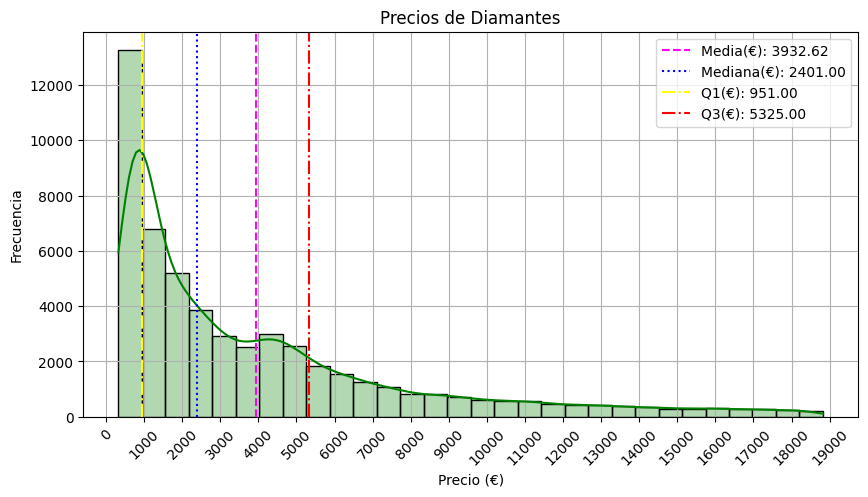

In [97]:
plt.figure(figsize=(10,5))
sns.histplot(df['price'], bins=30, color='green', kde=True, alpha=0.3)
plt.title("Precios de Diamantes")
plt.xlabel("Precio (€)")
plt.ylabel("Frecuencia")
plt.xticks(np.arange(0, max_price + 1000, 1000), rotation=45)
plt.axvline(media_price, color='magenta', linestyle='--', label=f'Media(€): {media_price:.2f}') # media
plt.axvline(mediana_price, color='blue', linestyle='dotted', label=f'Mediana(€): {mediana_price:.2f}') # mediana
plt.axvline(q1_price, color='yellow', linestyle='-.', label=f'Q1(€): {q1_price:.2f}') # Q1
plt.axvline(q3_price, color='red', linestyle='-.', label=f'Q3(€): {q3_price:.2f}') # Q3
plt.legend()
plt.grid()
plt.show();

##### 4.1.5.2-DISPERSIÓN, POSICIÓN NO CENTRAL Y DISPERSIÓN: BOXPLOT.

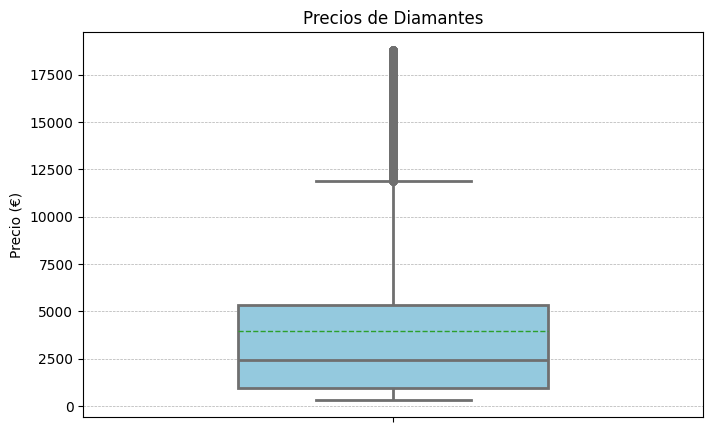

In [98]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df['price'], showmeans=True, meanline=True, orient='v', linewidth=2, fliersize=5, whis=1.5, dodge='auto',color='skyblue', width=0.5)
plt.title("Precios de Diamantes")
plt.ylabel("Precio (€)")
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show();

### 4.2-ANÁLISIS INFERENCIAL.

#### 4.2.1-FILTRADO DE OUTLIERS.

##### 4.2.1.1-FILTRADO Z-SCORE.

In [103]:
""" z = 3
df_sin_ouliers_z_score_price = df[(np.abs((df['price'] - media_price) / desv_price) < z)]
df_sin_ouliers_z_score_price.head() """;

In [128]:
# Se calculan los valores del DataFrame, filtrando los outliers de los valores de la colimna 'price', según el método "Z-Score"
z = 3
lim_inf_z_score = media_price - z * desv_price
lim_sup_z_score = media_price + z * desv_price

outliers_z_score = df[(df['price'] < lim_inf_z_score) | (df['price'] > lim_sup_z_score)] # Se seleccionan los elementos fuera de los límites superior e inferior
df_sin_outliers_z_score_price = df.drop(outliers_z_score.index).reset_index() # Se eliminan las filas contenidas en el DataFRame outliers
df_sin_outliers_z_score_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52591 entries, 0 to 52590
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   index      52591 non-null  int64   
 1   carat      52591 non-null  float32 
 2   cut        52591 non-null  category
 3   color      52591 non-null  category
 4   clarity    52591 non-null  category
 5   depth      52591 non-null  float32 
 6   table      52591 non-null  float32 
 7   price      52591 non-null  float32 
 8   price_iva  52591 non-null  float32 
 9   x          52591 non-null  float32 
 10  y          52591 non-null  float32 
 11  z          52591 non-null  float32 
 12  volumen    52591 non-null  float32 
dtypes: category(3), float32(9), int64(1)
memory usage: 2.4 MB


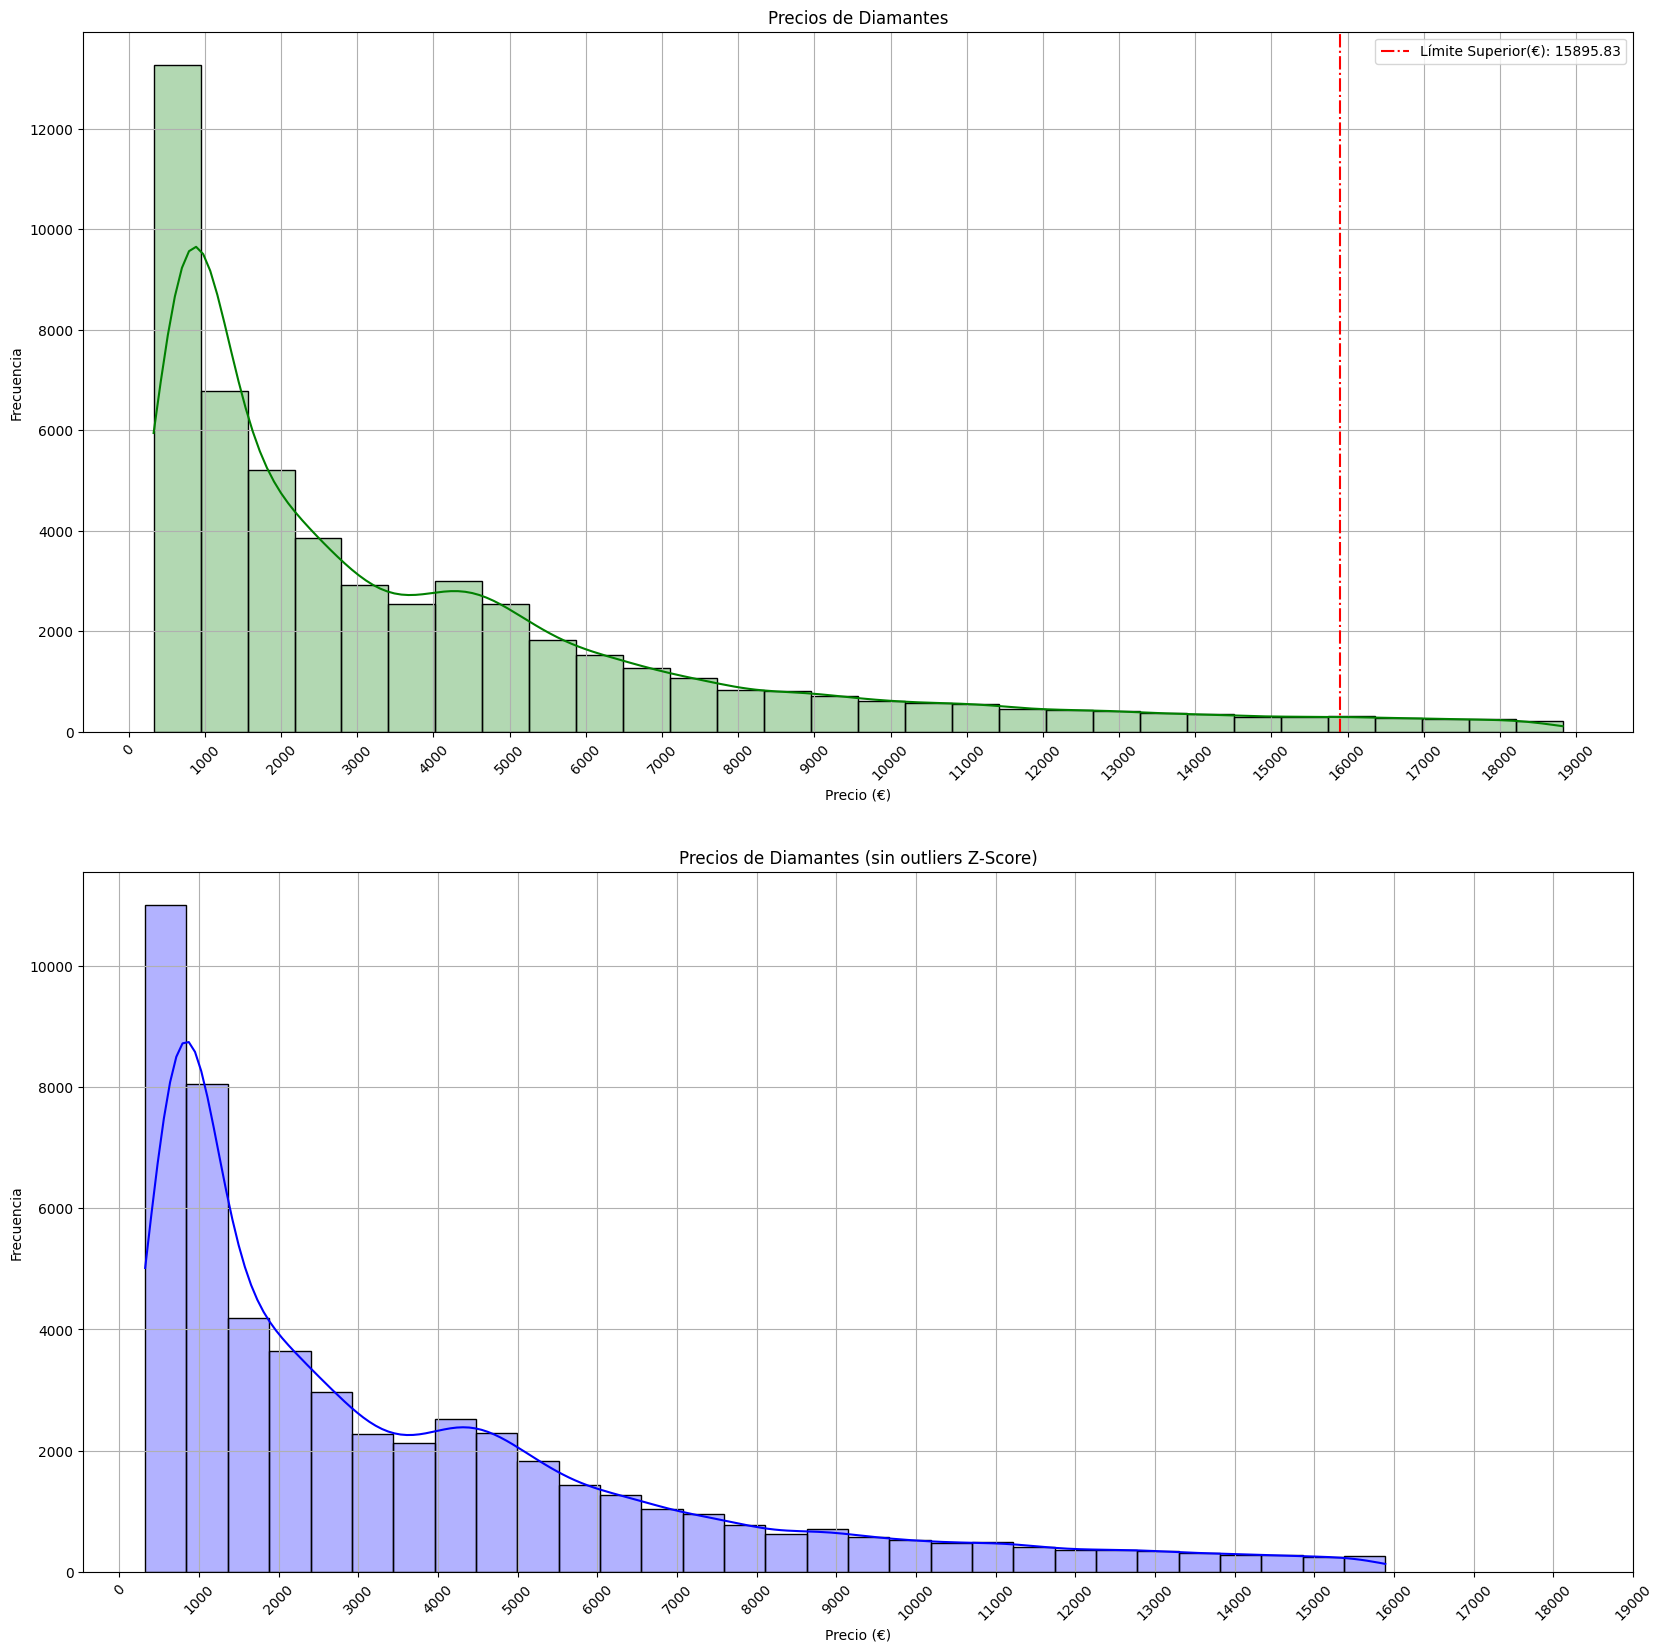

In [125]:
plt.figure(figsize=(20,20))
plt.subplot(2, 1, 1) # Histograma con outliers
sns.histplot(df['price'], bins=30, color='green', kde=True, alpha=0.3)
plt.title("Precios de Diamantes")
plt.xlabel("Precio (€)")
plt.ylabel("Frecuencia")
plt.xticks(np.arange(0, max_price + 1000, 1000), rotation=45)
# No se representa el límite inferior, porque es un valor negativo y no existen (ni deberían) existir precios con valor negativo.
# plt.axvline(lim_inf_z_score, color='yellow', linestyle='-.', label=f'Límite Inferior(€): {lim_inf_z_score:.2f}')
plt.axvline(lim_sup_z_score, color='red', linestyle='-.', label=f'Límite Superior(€): {lim_sup_z_score:.2f}')
plt.legend()
plt.grid()

plt.subplot(2, 1, 2) # Histograma sin outliers Z-Score
sns.histplot(df_sin_outliers_z_score_price['price'], bins=30, color='blue', kde=True, alpha=0.3)
plt.title("Precios de Diamantes (sin outliers Z-Score)")
plt.xlabel("Precio (€)")
plt.ylabel("Frecuencia")
plt.xticks(np.arange(0, max_price + 1000, 1000), rotation=45)
plt.grid()
plt.show();

##### 4.2.1.2-FILTRADO LA VALLA DE TUKEY.

In [129]:
# Se calculan los valores del DataFrame, filtrando los outliers de los valores de la colimna 'price', según el método "La Valla de Tukey".
k = 1.5
# Se calculan los límites inferior y superior.
lim_inf_tukey = q1_price - k * iqr_price
lim_sup_tukey = q3_price + k * iqr_price

outliers_tukey = df[(df['price'] < lim_inf_tukey) | (df['price'] > lim_sup_tukey)] # Se seleccionan los elementos fuera de los límites superior e inferior.
df_sin_outliers_tukey_price = df.drop(outliers_tukey.index).reset_index() # Se eliminan las filas contenidas en el DataFRame outliers.
df_sin_outliers_tukey_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50269 entries, 0 to 50268
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   index      50269 non-null  int64   
 1   carat      50269 non-null  float32 
 2   cut        50269 non-null  category
 3   color      50269 non-null  category
 4   clarity    50269 non-null  category
 5   depth      50269 non-null  float32 
 6   table      50269 non-null  float32 
 7   price      50269 non-null  float32 
 8   price_iva  50269 non-null  float32 
 9   x          50269 non-null  float32 
 10  y          50269 non-null  float32 
 11  z          50269 non-null  float32 
 12  volumen    50269 non-null  float32 
dtypes: category(3), float32(9), int64(1)
memory usage: 2.3 MB


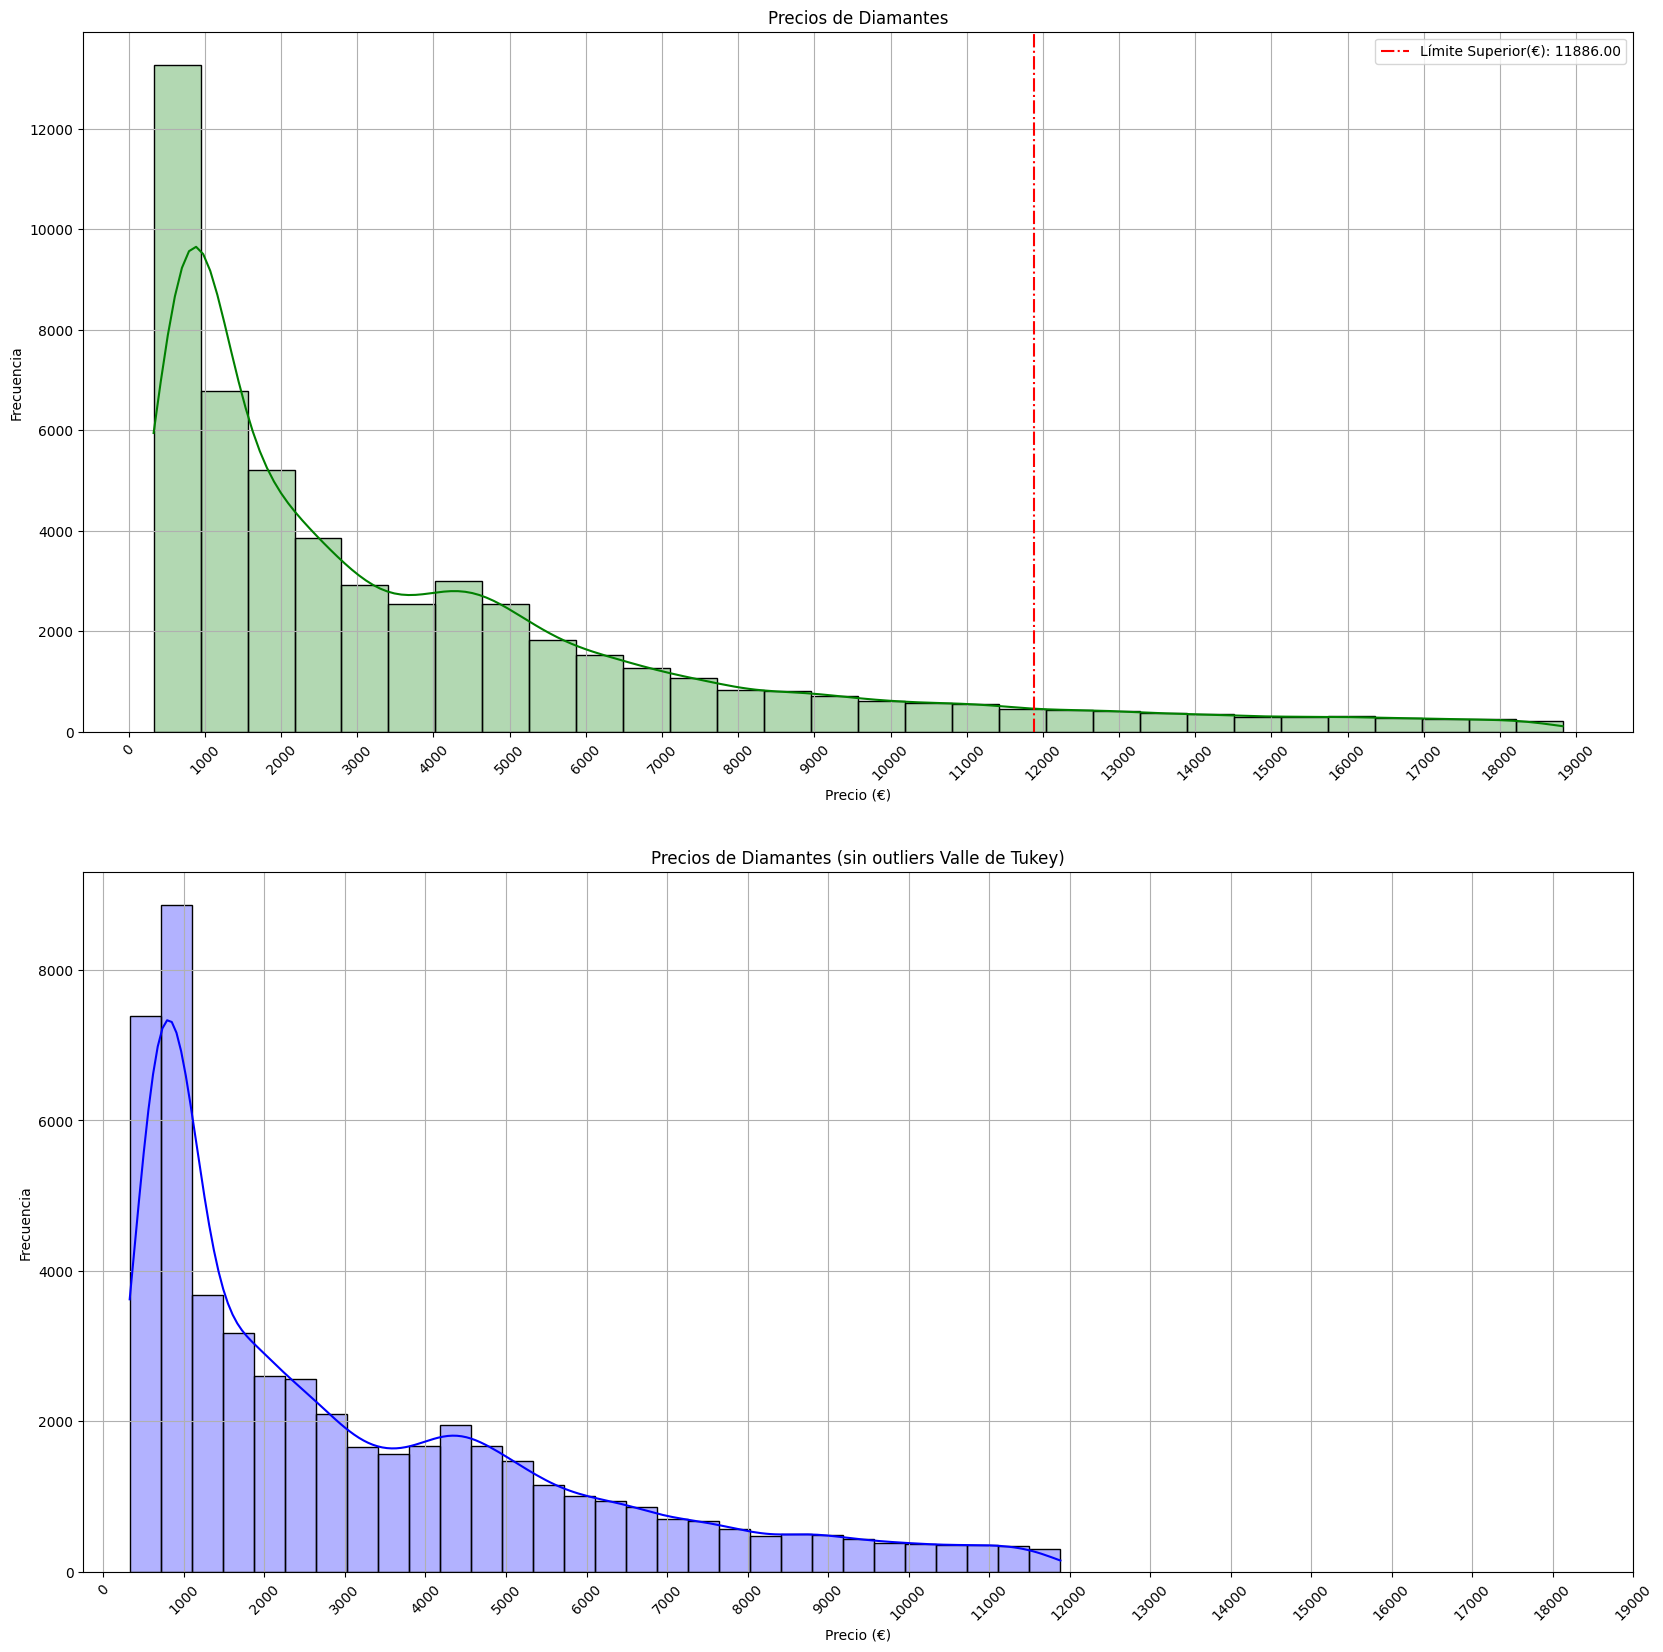

In [131]:
plt.figure(figsize=(20,20))
plt.subplot(2, 1, 1) # Histograma con outliers
sns.histplot(df['price'], bins=30, color='green', kde=True, alpha=0.3)
plt.title("Precios de Diamantes")
plt.xlabel("Precio (€)")
plt.ylabel("Frecuencia")
plt.xticks(np.arange(0, max_price + 1000, 1000), rotation=45)
# No se representa el límite inferior, porque es un valor negativo y no existen (ni deberían) existir precios con valor negativo.
#plt.axvline(lim_inf_tukey, color='yellow', linestyle='-.', label=f'Límite Inferior(€): {lim_inf_tukey:.2f}')
plt.axvline(lim_sup_tukey, color='red', linestyle='-.', label=f'Límite Superior(€): {lim_sup_tukey:.2f}')
plt.legend()
plt.grid()

plt.subplot(2, 1, 2) # Histograma sin outliers Valle de Tukey
sns.histplot(df_sin_outliers_tukey_price['price'], bins=30, color='blue', kde=True, alpha=0.3)
plt.title("Precios de Diamantes (sin outliers Valle de Tukey)")
plt.xlabel("Precio (€)")
plt.ylabel("Frecuencia")
plt.xticks(np.arange(0, max_price + 1000, 1000), rotation=45)
plt.grid()
plt.show();

#### 4.2.2-ASIMETRÍA.

In [132]:
asimetria_price = df['price'].skew()
print(f"El coeficiente de asimetría de la variable 'price' es: {asimetria_price}")

El coeficiente de asimetría de la variable 'price' es: 1.6182420253753662


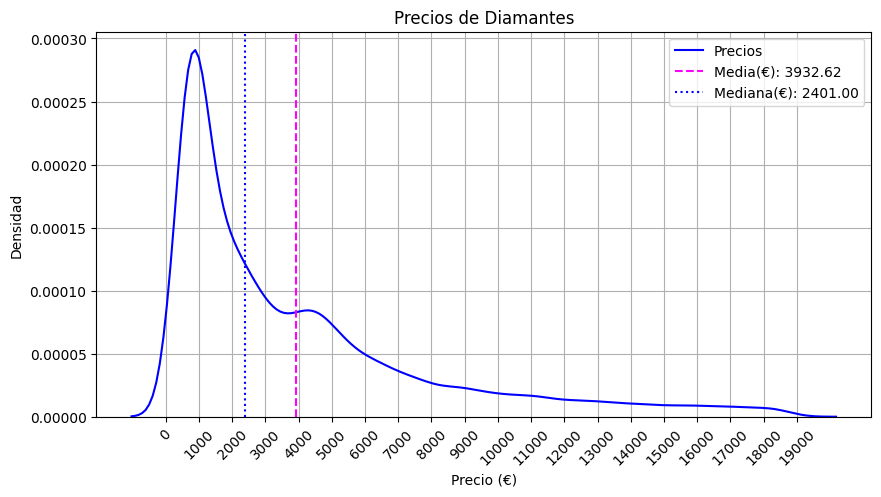

In [138]:
plt.figure(figsize=(10,5))
sns.kdeplot(df['price'], color='blue', label="Precios")
plt.title("Precios de Diamantes")
plt.xlabel("Precio (€)")
plt.ylabel("Densidad")
plt.xticks(np.arange(0, max_price + 1000, 1000), rotation=45)
plt.axvline(media_price, color='magenta', linestyle='--', label=f'Media(€): {media_price:.2f}') # media
plt.axvline(mediana_price, color='blue', linestyle='dotted', label=f'Mediana(€): {mediana_price:.2f}') # mediana
plt.legend()
plt.grid()
plt.show();

El coeficiente de asimetría resulta con un valor positivo y relativamente alto. Observando la gráfica, se aprecia que la distribución es claramente asimétrica, con una larga cola hacia la derecha del eje X. Esto indica la existencia de una distribución amplia y reseñable cantidad de observaciones con valores especialmente altos, afectando negativamentea la representatividad de la media del conjunto de datos.

#### 4.2.3-CURTOSIS.

In [136]:
curtosis_price = df['price'].kurtosis()
print(f"La curtosis de la variable 'price' es: {curtosis_price}")

La curtosis de la variable 'price' es: 2.1785504817962646


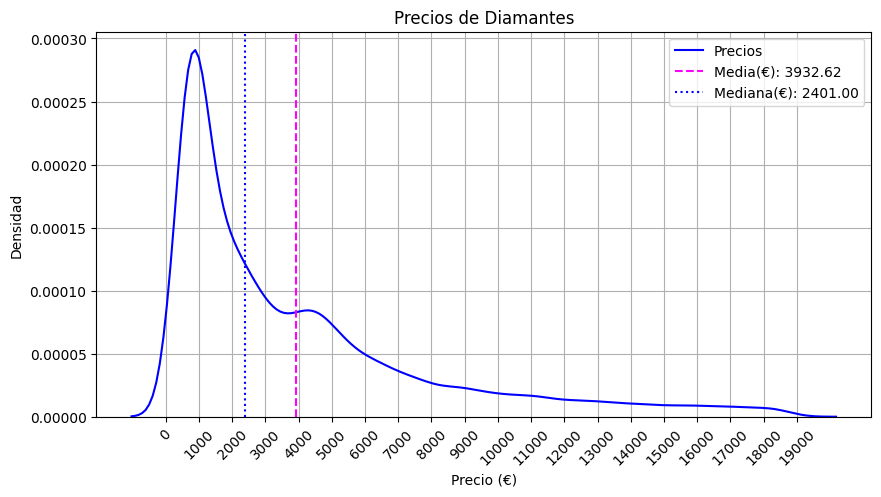

In [139]:
plt.figure(figsize=(10,5))
sns.kdeplot(df['price'], color='blue', label="Precios")
plt.title("Precios de Diamantes")
plt.xlabel("Precio (€)")
plt.ylabel("Densidad")
plt.xticks(np.arange(0, max_price + 1000, 1000), rotation=45)
plt.axvline(media_price, color='magenta', linestyle='--', label=f'Media(€): {media_price:.2f}') # media
plt.axvline(mediana_price, color='blue', linestyle='dotted', label=f'Mediana(€): {mediana_price:.2f}') # mediana
plt.legend()
plt.grid()
plt.show();

Esta distribución de valores presenta una curtosis de tipo Platicúrtica, con un valor positivo y relativamente moderado. Este valor se corresponde con la larga y estrecha cola hacia la derecha, indicando la presencia de valores extremos. El pico de valores es menos pronunciado, con una reseñable concentración de valores en la base alrededor de la mediana.

#### 4.2.3-TRANSFORMACIONES DE LA DISTRIBUCIÓN.

##### 4.2.3.1-FUNCIÓN RAÍZ.

In [140]:
# se crea una nueva columna, 'price_sqrt', con los valores resultantes de aplicar la función raíz a los valores de la columna 'precio'.
price_sqrt = pd.Series(df['price'].apply(np.sqrt)) # Se aplica la función raiz a la columna 'price'.
posicion = df.columns.get_loc('price') + 1 # Se busca la posición siguiente a la columna 'price'. Puede haber más columnas relacionadas con 'price'.
df.insert(posicion, 'price_sqrt', price_sqrt, allow_duplicates=False) # Se insertan los valores conla función raíz aplicada, a continuación de la columna 'price'.
df.head()

,carat,cut,color,clarity,depth,table,price,price_sqrt,price_iva,x,y,z,volumen
0,0.23,Ideal,E,SI2,61.500000,55.0,326.0,18.055470,394.460022,3.95,3.98,2.43,38.202034
1,0.21,Premium,E,SI1,59.799999,61.0,326.0,18.055470,394.460022,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.900002,65.0,327.0,18.083141,395.670013,4.05,4.07,2.31,38.076889
3,0.29,Premium,I,VS2,62.400002,58.0,334.0,18.275667,404.140015,4.20,4.23,2.63,46.724579
4,0.31,Good,J,SI2,63.299999,58.0,335.0,18.303005,405.350006,4.34,4.35,2.75,51.917248


##### 4.2.3.2-FUNCIÓN LOGARITMO.

In [141]:
# se crea una nueva columna, 'price_log', con los valores resultantes de aplicar la función logaritmo a los valores de la columna 'precio'.
price_log = pd.Series(df['price'].apply(np.log)) # Se aplica la función logaritmo a la columna 'price'.
posicion = df.columns.get_loc('price') + 1 # Se busca la posición siguiente a la columna 'price'. Puede haber más columnas relacionadas con 'price'.
df.insert(posicion, 'price_log', price_log, allow_duplicates=False) # Se insertan los valores conla función logaritmo aplicada, a continuación de la columna 'price'.
df.head()

,carat,cut,color,clarity,depth,table,price,price_log,price_sqrt,price_iva,x,y,z,volumen
0,0.23,Ideal,E,SI2,61.500000,55.0,326.0,5.786897,18.055470,394.460022,3.95,3.98,2.43,38.202034
1,0.21,Premium,E,SI1,59.799999,61.0,326.0,5.786897,18.055470,394.460022,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.900002,65.0,327.0,5.789960,18.083141,395.670013,4.05,4.07,2.31,38.076889
3,0.29,Premium,I,VS2,62.400002,58.0,334.0,5.811141,18.275667,404.140015,4.20,4.23,2.63,46.724579
4,0.31,Good,J,SI2,63.299999,58.0,335.0,5.814131,18.303005,405.350006,4.34,4.35,2.75,51.917248


##### 4.2.3.3-COMPARACIÓN DE DISTRIBUCIONES TRANSFORMADAS.

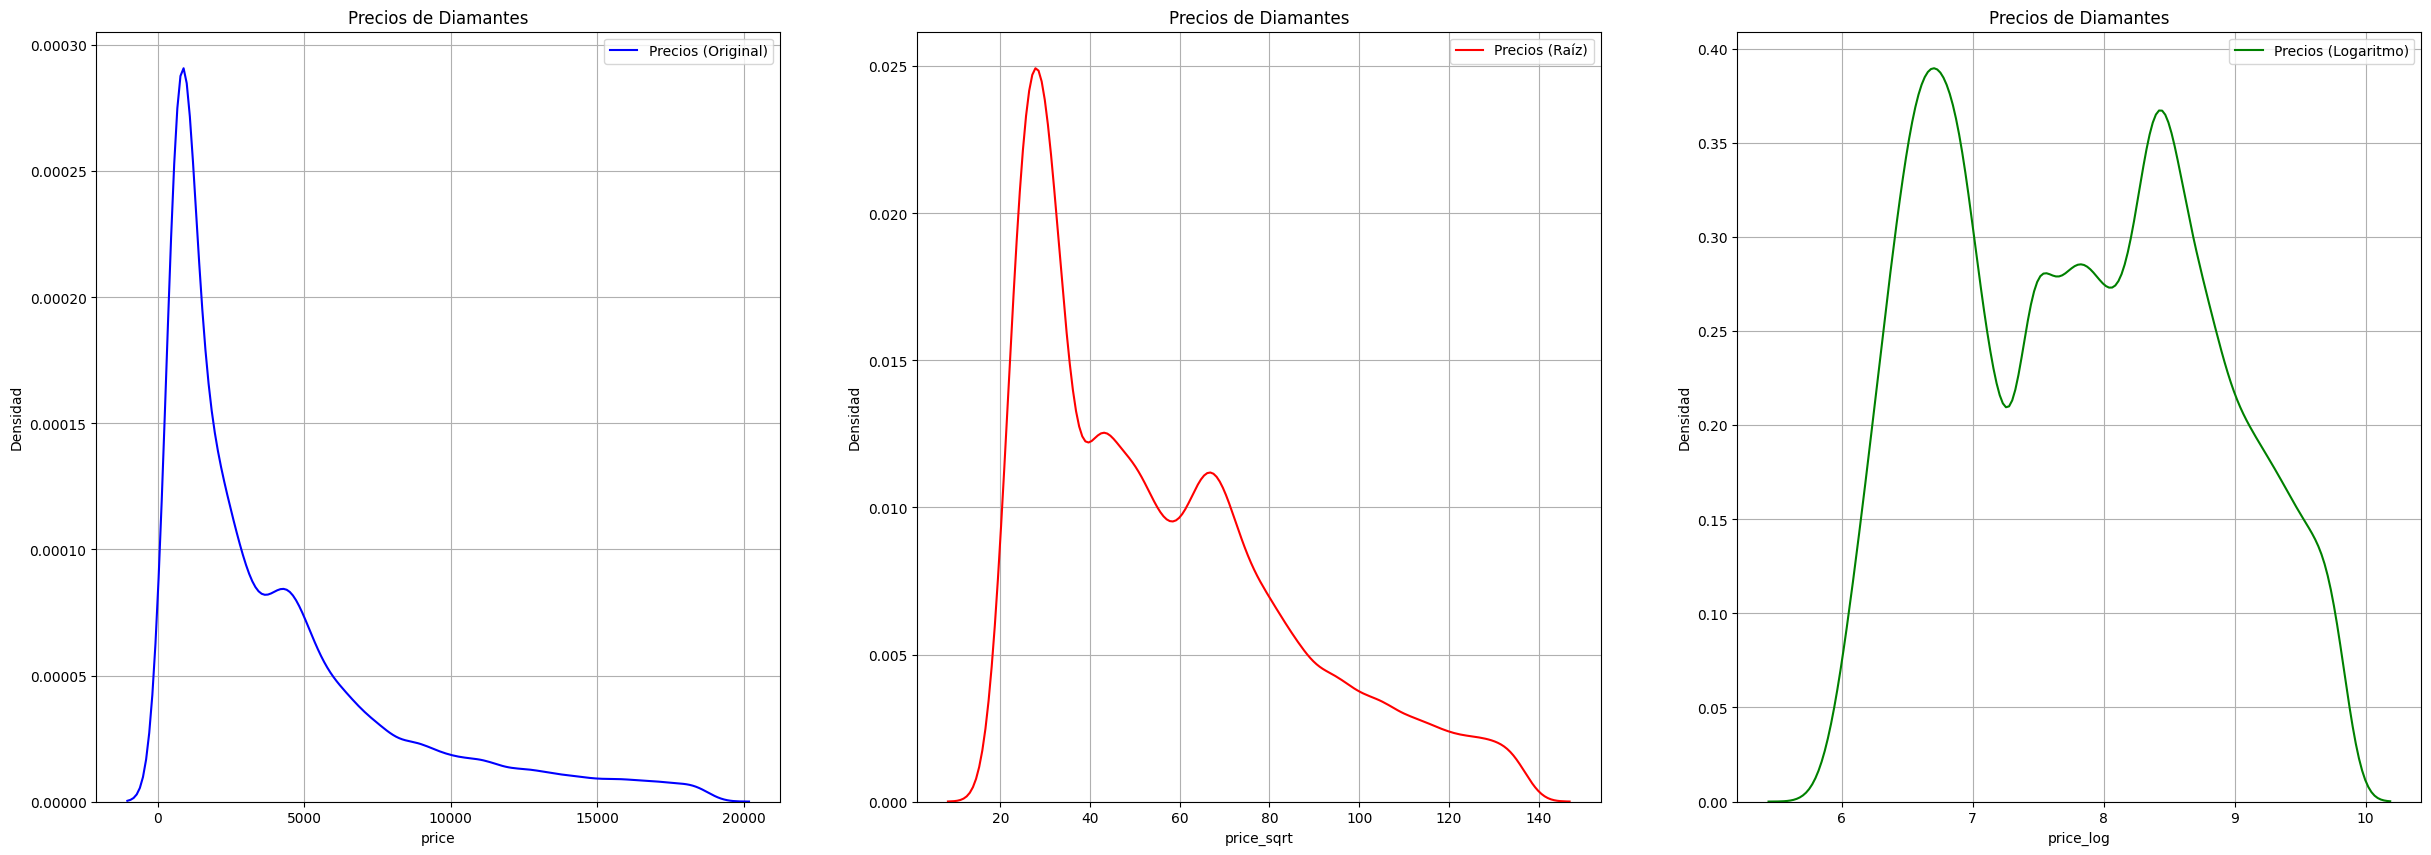

In [163]:
plt.figure(figsize=(30,10))
plt.subplot(1,3,1)
sns.kdeplot(df['price'], color='blue', label="Precios (Original)")
plt.title("Precios de Diamantes")
plt.ylabel("Densidad")
plt.legend()
plt.grid()

plt.subplot(1,3,2)
sns.kdeplot(df['price_sqrt'], color='red', label="Precios (Raíz)")
plt.title("Precios de Diamantes")
plt.ylabel("Densidad")
plt.legend()
plt.grid()

plt.subplot(1,3,3)
sns.kdeplot(df['price_log'], color='green', label="Precios (Logaritmo)")
plt.title("Precios de Diamantes")
plt.ylabel("Densidad")
plt.legend()
plt.grid()

plt.show();

Se aprecia cómo la variable transformada mediante la aplicación de la función logarítmica presenta la distribución más cercana de las tres a una distribución normal.

#### 4.2.4-DISCRETIZACIÓN DE VALORES.